# Date Analysis

În acest notebook analizez complet întregul dataset, pe care îl prelucrez, după părerea mea, acolo unde este nevoie.

În unele locuri am lăsat notițe despre gândurile mele referitoare la date, dar nu peste tot, nu am reușit să las câte un gând în fiecare loc.

În mare parte, în acest notebook am realizat tot codul fără complicații, doar verificând, analizând și prelucrarea. Ca după ce voi avea totul în fața mea, mă voi duce în notebookul training și îl voi organiza mai bine, pe baza a tot ce am făcut în acest notebook.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from tqdm import tqdm

In [153]:
pd.set_option('display.max_columns', 50)

In [154]:
df = pd.read_csv('data.csv') 

In [155]:
X = df.drop(['price'], axis=1)
y = df['price']

Împart datasetul pe părți

In [156]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [157]:
X_val['l3'].value_counts().size

822

Eliminarea de randuri in care coloanele principale sunt nan

In [158]:
search_nan_rows = X_val[X_val.loc[:, ['lat', 'lon', 'l3', 'l4', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'price_period']].isna().all(axis=1)].index
X_val.drop(search_nan_rows, axis=0, inplace=True)
y_val.drop(search_nan_rows, axis=0, inplace=True)

In [159]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149991 entries, 153492 to 683726
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               149991 non-null  object 
 1   ad_type          149991 non-null  object 
 2   start_date       149991 non-null  object 
 3   end_date         149991 non-null  object 
 4   created_on       149991 non-null  object 
 5   lat              127379 non-null  float64
 6   lon              127245 non-null  float64
 7   l1               149991 non-null  object 
 8   l2               149991 non-null  object 
 9   l3               141901 non-null  object 
 10  l4               35866 non-null   object 
 11  l5               725 non-null     object 
 12  l6               0 non-null       float64
 13  rooms            79115 non-null   float64
 14  bedrooms         70060 non-null   float64
 15  bathrooms        116538 non-null  float64
 16  surface_total    56873 non-null   floa

In [160]:
X_val.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,127379.000000,127245.000000,0.0,79115.000000,70060.000000,116538.000000,56873.000000,5.714100e+04
mean,-34.791437,-59.268708,NaN,2.860128,2.105638,1.707649,527.718285,1.035956e+03
std,2.940526,2.655389,NaN,1.699140,2.253497,1.073245,4494.296353,1.264828e+05
min,-54.840886,-111.611617,NaN,1.000000,0.000000,1.000000,10.000000,-2.000000e+00
25%,-34.920242,-58.750958,NaN,2.000000,1.000000,1.000000,50.000000,4.500000e+01
50%,-34.611068,-58.448667,NaN,3.000000,2.000000,1.000000,95.000000,7.700000e+01
75%,-34.453692,-58.172766,NaN,4.000000,3.000000,2.000000,253.000000,1.650000e+02
max,47.545277,-5.490771,NaN,40.000000,370.000000,20.000000,200000.000000,2.700000e+07


In [161]:
X_val = X_val.drop(['id'], axis=1)

Consider coloana `ad_type` ne relevanta pentru ca toate randurile au aceiasi valoare si nu se diferentiaza

In [162]:
X_val['ad_type'].value_counts()

ad_type
Propiedad    149991
Name: count, dtype: int64

In [163]:
X_val = X_val.drop(['ad_type'], axis=1)

In [164]:
X_val['end_date']

153492    2020-06-21
765489    2020-09-10
881637    9999-12-31
717120    2020-05-26
945151    9999-12-31
             ...    
146165    2020-11-16
128962    2020-09-04
392080    2021-01-25
669591    9999-12-31
683726    2020-03-24
Name: end_date, Length: 149991, dtype: object

In [165]:
X_val['start_date'] = pd.to_datetime(X_val['start_date'], errors='coerce')
X_val['end_date'] = pd.to_datetime(X_val['end_date'], errors='coerce')
X_val['created_on'] = pd.to_datetime(X_val['created_on'], errors='coerce')

In [166]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149991 entries, 153492 to 683726
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       149991 non-null  datetime64[ns]
 1   end_date         117398 non-null  datetime64[ns]
 2   created_on       149991 non-null  datetime64[ns]
 3   lat              127379 non-null  float64       
 4   lon              127245 non-null  float64       
 5   l1               149991 non-null  object        
 6   l2               149991 non-null  object        
 7   l3               141901 non-null  object        
 8   l4               35866 non-null   object        
 9   l5               725 non-null     object        
 10  l6               0 non-null       float64       
 11  rooms            79115 non-null   float64       
 12  bedrooms         70060 non-null   float64       
 13  bathrooms        116538 non-null  float64       
 14  surface_total    568

In [167]:
X_val['end_date']

153492   2020-06-21
765489   2020-09-10
881637          NaT
717120   2020-05-26
945151          NaT
            ...    
146165   2020-11-16
128962   2020-09-04
392080   2021-01-25
669591          NaT
683726   2020-03-24
Name: end_date, Length: 149991, dtype: datetime64[ns]

In [168]:
X_val['end_date'].describe()

count                           117398
mean     2020-07-03 05:07:10.596773888
min                2019-12-23 00:00:00
25%                2020-04-03 00:00:00
50%                2020-06-08 00:00:00
75%                2020-10-01 00:00:00
max                2021-03-15 00:00:00
Name: end_date, dtype: object

In [169]:
X_val[['start_date', 'end_date', 'created_on']] = X_val[['start_date', 'end_date', 'created_on']].fillna(-1) #Valorile Not a Time converted to -1

In [170]:
X_val['start_date'] = pd.to_datetime(X_val['start_date'], errors='coerce')
X_val['end_date'] = pd.to_datetime(X_val['end_date'], errors='coerce')
X_val['created_on'] = pd.to_datetime(X_val['created_on'], errors='coerce')

Dupa min si max din describe se vede ca la start_date valoarea min e mai mica de cat valoarea min la end_date, la fel si cu valoarea max

In [171]:
X_val['start_date'].describe()

count                           149991
mean     2020-06-07 03:55:14.574874624
min                2019-12-22 00:00:00
25%                2020-03-09 00:00:00
50%                2020-05-10 00:00:00
75%                2020-09-13 00:00:00
max                2021-01-14 00:00:00
Name: start_date, dtype: object

In [172]:
X_val['end_date'].describe()

count                           149991
mean     2009-07-12 20:33:31.224673792
min      1969-12-31 23:59:59.999999999
25%                2020-02-10 00:00:00
50%                2020-04-28 00:00:00
75%                2020-09-04 00:00:00
max                2021-03-15 00:00:00
Name: end_date, dtype: object

In [173]:
X_val['l1'].value_counts()

l1
Argentina         147874
Uruguay             1992
Estados Unidos       110
Brasil                15
Name: count, dtype: int64

In [174]:
X_val['l1'].info()

<class 'pandas.core.series.Series'>
Index: 149991 entries, 153492 to 683726
Series name: l1
Non-Null Count   Dtype 
--------------   ----- 
149991 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [175]:
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_data = encoder.fit_transform(X_val[['l1']])
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['l1']), index=X_val.index)
X_val = pd.concat([X_val, encoded_data], axis=1)
X_val = X_val.drop(['l1'], axis=1)

In [176]:
X_val[X_val['l1_Argentina'] == 1.0]['l2'].value_counts()

l2
Capital Federal                 36122
Buenos Aires Costa Atlántica    26544
Bs.As. G.B.A. Zona Norte        20730
Bs.As. G.B.A. Zona Sur          18535
Santa Fe                        12971
Bs.As. G.B.A. Zona Oeste        11368
Córdoba                         10251
Buenos Aires Interior            3422
Neuquén                          1588
Mendoza                          1336
Entre Ríos                        839
Misiones                          797
Tucumán                           728
Río Negro                         721
Salta                             504
San Luis                          306
La Pampa                          187
San Juan                          184
Chaco                             151
Corrientes                        141
Chubut                            138
Jujuy                              83
Tierra Del Fuego                   53
Catamarca                          48
Santa Cruz                         48
La Rioja                           44
Santiago 

In [177]:
X_val[X_val['l1_Brasil'] == 1.0]['l2'].value_counts()

l2
Santa Catarina         7
São Paulo              5
Rio Grande do Norte    2
Rio de Janeiro         1
Name: count, dtype: int64

In [178]:
X_val[X_val['l1_Estados Unidos'] == 1.0]['l2'].value_counts()

l2
Florida         63
Michigan        23
Miami           19
Maryland         3
Pennsylvania     2
Name: count, dtype: int64

In [179]:
X_val[X_val['l1_Uruguay'] == 1.0]['l2'].value_counts()

l2
Maldonado     1043
Montevideo     649
Colonia        190
Canelones       96
Rocha           14
Name: count, dtype: int64

In [180]:
df['property_type'].value_counts()

property_type
Departamento       373376
Otro               239720
Casa               190023
Lote                83792
PH                  35217
Local comercial     34493
Oficina             26365
Cochera              8908
Depósito             6502
Casa de campo        1604
Name: count, dtype: int64

In [181]:
X_val['property_type'].value_counts()

property_type
Departamento       56059
Otro               35915
Casa               28671
Lote               12549
PH                  5214
Local comercial     5153
Oficina             3890
Cochera             1354
Depósito             927
Casa de campo        259
Name: count, dtype: int64

In [182]:
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_data = encoder.fit_transform(X_val[['property_type']])
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['property_type']), index=X_val.index)
X_val = pd.concat([X_val, encoded_data], axis=1)
X_val = X_val.drop(['property_type'], axis=1)

In [183]:
#binary_columns = encoder.get_feature_names_out(['property_type'])
#
#X_val['property_type_code'] = X_val[binary_columns].dot(2 ** np.arange(len(binary_columns)))
#X_val = X_val.drop(columns=binary_columns)

In [184]:
X_val['operation_type'].value_counts()

operation_type
Venta                117556
Alquiler              27342
Alquiler temporal      5093
Name: count, dtype: int64

In [185]:
X_val['operation_type'] = X_val['operation_type'].replace({
    'Venta': 0,
    'Alquiler': 1,
    'Alquiler temporal': 2
})

C:\Users\Home\AppData\Local\Temp\ipykernel_10360\2412190954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val['operation_type'] = X_val['operation_type'].replace({


In [186]:
y_val

153492    190000.0
765489     12500.0
881637    150000.0
717120     36000.0
945151     95000.0
            ...   
146165     36000.0
128962         NaN
392080     13000.0
669591    135000.0
683726    320000.0
Name: price, Length: 149991, dtype: float64

In [187]:
X_val = X_val.drop(['l5'], axis=1)
X_val = X_val.drop(['l6'], axis=1)
X_val = X_val.drop(['title'], axis=1)
X_val = X_val.drop(['description'], axis=1)

In [188]:
X_val = X_val.drop(y_val[y_val.isna()].index, axis=0)
y_val = y_val.drop(y_val[y_val.isna()].index, axis=0)

In [189]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144541 entries, 153492 to 683726
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     144541 non-null  datetime64[ns]
 1   end_date                       144541 non-null  datetime64[ns]
 2   created_on                     144541 non-null  datetime64[ns]
 3   lat                            122789 non-null  float64       
 4   lon                            122655 non-null  float64       
 5   l2                             144541 non-null  object        
 6   l3                             136775 non-null  object        
 7   l4                             34889 non-null   object        
 8   rooms                          76155 non-null   float64       
 9   bedrooms                       67153 non-null   float64       
 10  bathrooms                      112932 non-null  float64       
 11  

In [190]:
X_val['currency'].value_counts()

currency
USD    113957
ARS     30070
UYU       262
PEN        38
Name: count, dtype: int64

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

In [192]:
df['currency'].value_counts()

currency
USD    757617
ARS    202179
UYU      1692
PEN       231
Name: count, dtype: int64

In [193]:
X_val['currency'] = X_val['currency'].fillna(0)
X_val['currency'] = X_val['currency'].replace({
    'USD': 1,
    'ARS': 2,
    'UYU': 3,
    'PEN': 4
})

C:\Users\Home\AppData\Local\Temp\ipykernel_10360\1639412363.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val['currency'] = X_val['currency'].replace({


Operation type "venta"(Vanzare) pentru Mensual(Chirie pe lună), nu are logică, ci se vinde nu se închiriază

In [194]:
print(df.groupby(['operation_type', 'price_period']).size())

operation_type     price_period
Alquiler           Mensual          80403
Alquiler temporal  Diario               8
                   Mensual          19794
                   Semanal             29
Venta              Mensual         262781
dtype: int64


In [195]:
df[df['operation_type'].str.contains('Alquiler')].groupby(
    ['operation_type', 'price_period']
)['price'].mean()

operation_type     price_period
Alquiler           Mensual          43865.585915
Alquiler temporal  Diario           40110.000000
                   Mensual          27401.945658
                   Semanal         139234.827586
Name: price, dtype: float64

In [196]:
df['operation_type'].value_counts()

operation_type
Venta                782122
Alquiler             183927
Alquiler temporal     33951
Name: count, dtype: int64

In [197]:
df['price_period'].value_counts()

price_period
Mensual    362978
Semanal        29
Diario          8
Name: count, dtype: int64

Corelația între `price` și `price_period` e practic 0, deci cel mai bine ar fi de șters

In [198]:
df_temp = df.loc[:, ['price', 'price_period']]
df_temp['price_period'] = df_temp['price_period'].replace({
    'Mensual': 1,
    'Semanal': 2,
    'Diario': 3
})
df_temp.corr()

C:\Users\Home\AppData\Local\Temp\ipykernel_10360\1574348363.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['price_period'] = df_temp['price_period'].replace({


,price,price_period
price,1.000000,-0.000254
price_period,-0.000254,1.000000


In [199]:
X_val.drop(['price_period'], axis=1, inplace=True)

In [200]:
df.loc[:, ['lat', 'lon', 'price']].corr(method='pearson')

,lat,lon,price
lat,1.000000,-0.389202,0.007371
lon,-0.389202,1.000000,-0.008021
price,0.007371,-0.008021,1.000000


Corelatia dintre mean a `lat` si `lon` pentru `price` e mai mica de cat fiecare in parte, nu prea are relevanta.

Dar sar putea de prezis cu ajutorul lor zonele administrative lipsă.

In [201]:
pd.concat([df.loc[:, ['lat', 'lon']].mean(axis=1), df['price']], axis=1).corr(method='pearson')

,0,price
0,1.000000,0.000305
price,0.000305,1.000000


In [202]:
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_data = encoder.fit_transform(df[['l1']])
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['l1']), index=df.index)
df_temp = pd.concat([df, encoded_data], axis=1)

df_temp.loc[:, ['lat', 'lon', 'l1_Argentina', 'l1_Brasil', 'l1_Estados Unidos', 'l1_Uruguay']].corr(method='pearson')

,lat,lon,l1_Argentina,l1_Brasil,l1_Estados Unidos,l1_Uruguay
lat,1.000000,-0.389202,-0.148468,0.035010,0.636991,-0.001966
lon,-0.389202,1.000000,-0.111681,0.043048,-0.234168,0.167373
l1_Argentina,-0.148468,-0.111681,1.000000,-0.082685,-0.220718,-0.971035
l1_Brasil,0.035010,0.043048,-0.082685,1.000000,-0.000264,-0.001163
l1_Estados Unidos,0.636991,-0.234168,-0.220718,-0.000264,1.000000,-0.003104
l1_Uruguay,-0.001966,0.167373,-0.971035,-0.001163,-0.003104,1.000000


In [203]:
df.loc[:, ['lat', 'lon', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     849189 non-null  float64
 1   lon     848255 non-null  float64
 2   price   963098 non-null  float64
dtypes: float64(3)
memory usage: 22.9 MB


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

In [205]:
df.loc[:, ['lat', 'lon', 'l3']][df['l3'].isna() & df['lon'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 27923 entries, 353 to 999856
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     63 non-null     float64
 1   lon     0 non-null      float64
 2   l3      0 non-null      object 
dtypes: float64(2), object(1)
memory usage: 872.6+ KB


In [206]:
df.loc[:, ['lat', 'lon', 'l3']][df['lon'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151745 entries, 35 to 999974
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     934 non-null     float64
 1   lon     0 non-null       float64
 2   l3      123822 non-null  object 
dtypes: float64(2), object(1)
memory usage: 4.6+ MB


In [207]:
df.loc[:, ['lat', 'lon', 'l3']][df['lat'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 150811 entries, 35 to 999974
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     0 non-null       float64
 1   lon     0 non-null       float64
 2   l3      122951 non-null  object 
dtypes: float64(2), object(1)
memory usage: 4.6+ MB


In [208]:
df['l2'].value_counts()

l2
Capital Federal                 242291
Buenos Aires Costa Atlántica    176721
Bs.As. G.B.A. Zona Norte        137586
Bs.As. G.B.A. Zona Sur          124074
Santa Fe                         86710
Bs.As. G.B.A. Zona Oeste         75683
Córdoba                          67771
Buenos Aires Interior            22634
Neuquén                          10528
Mendoza                           8501
Maldonado                         7280
Entre Ríos                        5497
Misiones                          5137
Río Negro                         4993
Tucumán                           4959
Montevideo                        4345
Salta                             3276
San Luis                          1969
La Pampa                          1269
Colonia                           1180
San Juan                          1064
Chaco                             1040
Corrientes                        1001
Chubut                             920
Jujuy                              555
Canelones             

In [209]:
def categorize(df: pd.DataFrame, col: str, threshold: int, new_category: str) -> pd.DataFrame:
    df_temp = df.copy()
    counts = df_temp[col].value_counts()

    df_temp[col] = df_temp[col].map(lambda x: x if counts[x] >= threshold else new_category)

    return df_temp

def encode1(col: pd.Series) -> pd.Series:
    return col.astype('category').cat.codes

In [210]:
X_val = categorize(X_val, 'l2', 2000, 'Other')

In [211]:
X_val['l2'].value_counts()

l2
Capital Federal                 35261
Buenos Aires Costa Atlántica    26022
Bs.As. G.B.A. Zona Norte        20348
Bs.As. G.B.A. Zona Sur          18130
Santa Fe                        11865
Bs.As. G.B.A. Zona Oeste        11007
Córdoba                          9802
Other                            8899
Buenos Aires Interior            3207
Name: count, dtype: int64

In [212]:
X_val['l2'] = encode1(X_val['l2'])

In [213]:
df_temp['l2'] = df_temp['l2'].astype('category').cat.codes

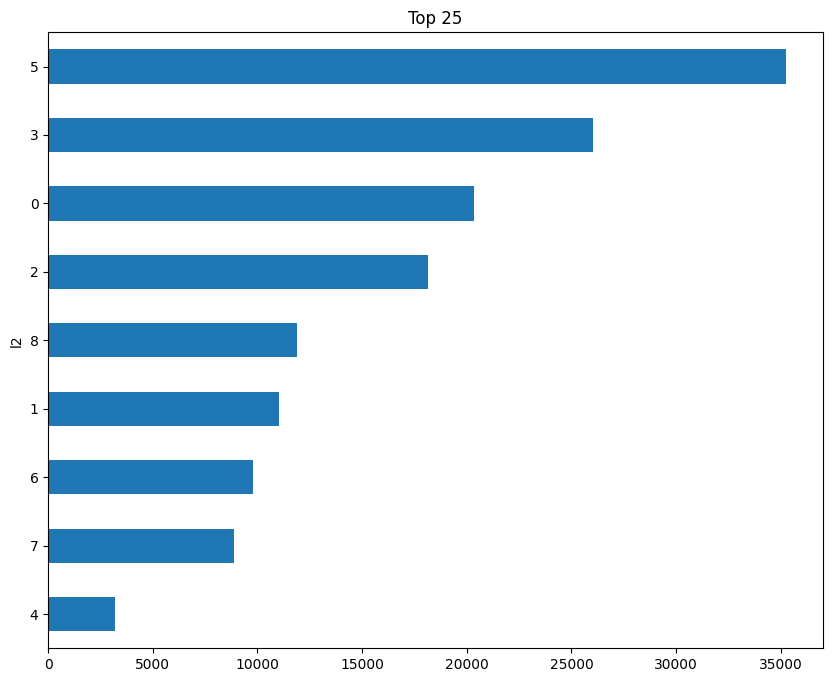

In [214]:
X_val['l2'].value_counts().head(25).plot(kind='barh', figsize=(10, 8))
plt.gca().invert_yaxis()
plt.title('Top 25')
plt.show()

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

In [216]:
df['l3'].nunique(), df['l4'].nunique()

(1301, 1018)

In [217]:
df['l3'].value_counts().describe()

count      1301.000000
mean        727.650269
std        5380.850061
min           1.000000
25%           2.000000
50%           7.000000
75%          67.000000
max      153515.000000
Name: count, dtype: float64

In [218]:
X_val['l3'] = X_val['l3'].fillna('Missing')

In [219]:
X_val = categorize(X_val, 'l3', 600, 'Other')

In [220]:
X_val['l3'] = encode1(X_val['l3'])

In [221]:
df['l3'].value_counts().size

1301

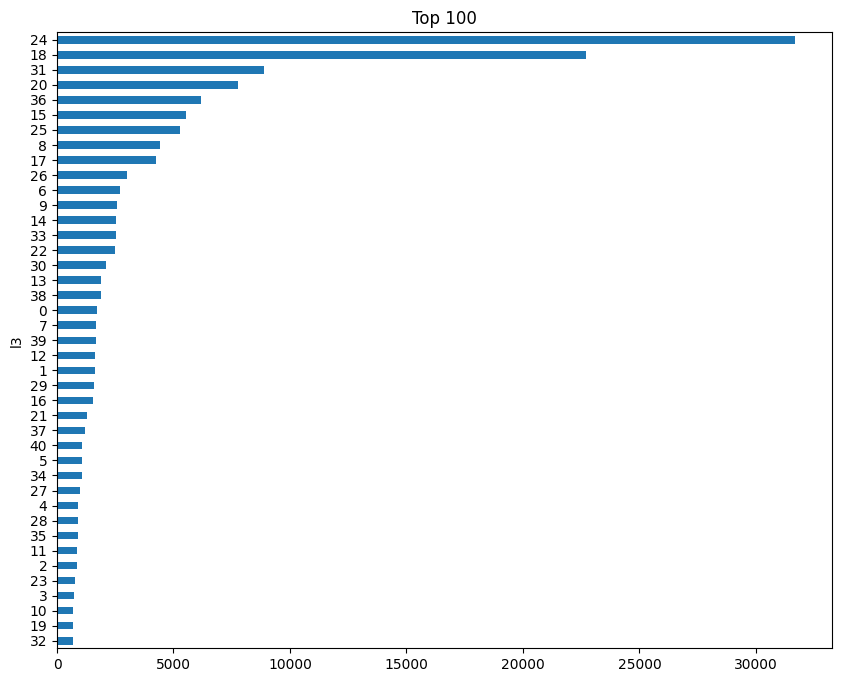

In [222]:
X_val['l3'].value_counts().head(100).plot(kind='barh', figsize=(10, 8))
plt.gca().invert_yaxis()
plt.title('Top 100')
plt.show()

In [223]:
df['l4'].isna().value_counts()

l4
True     760504
False    239496
Name: count, dtype: int64

In [224]:
df[df['l3'].isna()].shape

(53327, 25)

In [225]:
df['l4'][df['l4'][df['l3'].isna()].isna().index]

0         NaN
1         NaN
40        NaN
61        NaN
97        NaN
         ... 
999995    NaN
999996    NaN
999997    NaN
999998    NaN
999999    NaN
Name: l4, Length: 53327, dtype: object

In [226]:
df['lat'][df['l4'].isna()].isna().value_counts()

lat
False    646052
True     114452
Name: count, dtype: int64

In [227]:
df['lon'][df['l4'].isna()].isna().value_counts()

lon
False    645474
True     115030
Name: count, dtype: int64

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

In [229]:
X_val['l2'].corr(y_val), X_val['l3'].corr(y_val)

(np.float64(0.03526601888248801), np.float64(0.02152384158150289))

In [230]:
X_val['rooms'].corr(y_val)

np.float64(0.05374882544054802)

In [231]:
l2_l3 = pd.DataFrame(np.mean([X_val['l2'], X_val['l3']], axis=0), columns=['l2_l3'], index=X_val.index)
l2_l3['price'] = y_val

In [232]:
l2_l3.corr(method='kendall')

,l2_l3,price
l2_l3,1.000000,0.010358
price,0.010358,1.000000


Luand in considerare ca per general corelatia cu coloana tinta, price a l2 si l3, e minora, deci nu are asa o semnificatie mare.
Pe baza la acesta, luand că l4 are foarte multe valori nule, deci e complicat sa le fac sa fie semnificative si nu prea are sens, ci doar cele primele 3 nivele administrative sunt cele mai relevante

In [233]:
X_val = X_val.drop(['l4'], axis=1)

In [234]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144541 entries, 153492 to 683726
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     144541 non-null  datetime64[ns]
 1   end_date                       144541 non-null  datetime64[ns]
 2   created_on                     144541 non-null  datetime64[ns]
 3   lat                            122789 non-null  float64       
 4   lon                            122655 non-null  float64       
 5   l2                             144541 non-null  int8          
 6   l3                             144541 non-null  int8          
 7   rooms                          76155 non-null   float64       
 8   bedrooms                       67153 non-null   float64       
 9   bathrooms                      112932 non-null  float64       
 10  surface_total                  54021 non-null   float64       
 11  

In [235]:
X_val

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,operation_type,l1_Argentina,l1_Brasil,l1_Estados Unidos,l1_Uruguay,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
153492,2020-06-11,2020-06-21 00:00:00.000000000,2020-06-11,NaN,NaN,1,37,5.0,3.0,2.0,208.0,145.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765489,2020-09-02,2020-09-10 00:00:00.000000000,2020-09-02,-34.663544,-58.757103,1,19,1.0,NaN,1.0,35.0,35.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
881637,2020-12-12,1969-12-31 23:59:59.999999999,2020-12-12,-34.564850,-58.466423,5,6,3.0,2.0,1.0,175.0,49.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
717120,2020-05-22,2020-05-26 00:00:00.000000000,2020-05-22,-34.596225,-58.412979,5,25,2.0,NaN,1.0,NaN,NaN,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
945151,2021-01-06,1969-12-31 23:59:59.999999999,2021-01-06,-38.935762,-68.121459,7,20,3.0,2.0,1.0,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558445,2020-10-22,1969-12-31 23:59:59.999999999,2020-10-22,-34.503638,-58.510324,0,38,3.0,2.0,1.0,47.0,47.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146165,2020-09-07,2020-11-16 00:00:00.000000000,2020-09-07,NaN,NaN,5,25,2.0,1.0,1.0,41.0,37.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
392080,2020-10-29,2021-01-25 00:00:00.000000000,2020-10-29,-32.937241,-60.648834,8,31,1.0,NaN,1.0,32.0,32.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
669591,2020-06-09,1969-12-31 23:59:59.999999999,2020-06-09,-38.012451,-57.602266,3,18,NaN,NaN,NaN,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Testare dacă sumarea la cameri va da o corelație mai mare cu coloana țintă

In [236]:

pd.DataFrame(pd.concat(
        [
            X_val[['rooms', 'bedrooms', 'bathrooms']], 
            X_val[['rooms', 'bedrooms', 'bathrooms']].sum(axis=1),
            X_val[['rooms', 'bedrooms', 'bathrooms']].mean(axis=1),
            X_val[['rooms', 'bedrooms', 'bathrooms']].median(axis=1),
            y_val
        ], 
        axis=1  
    ).values, 
    columns=['rooms', 'bedrooms', 'bathrooms', 'sum', 'mean', 'median', 'price']
).corr(method='pearson')

,rooms,bedrooms,bathrooms,sum,mean,median,price
rooms,1.000000,0.806507,0.623653,0.922978,0.934136,0.880092,0.053749
bedrooms,0.806507,1.000000,0.659432,0.850094,0.926427,0.913446,0.093805
bathrooms,0.623653,0.659432,1.000000,0.569596,0.861549,0.856233,0.023696
sum,0.922978,0.850094,0.569596,1.000000,0.822165,0.774792,0.024340
mean,0.934136,0.926427,0.861549,0.822165,1.000000,0.978281,0.044483
median,0.880092,0.913446,0.856233,0.774792,0.978281,1.000000,0.042737
price,0.053749,0.093805,0.023696,0.024340,0.044483,0.042737,1.000000


In [237]:
pd.DataFrame(pd.concat(
        [
            X_val[['rooms', 'bedrooms', 'bathrooms']], 
            X_val[['rooms', 'bedrooms', 'bathrooms']].sum(axis=1),
            X_val[['rooms', 'bedrooms', 'bathrooms']].mean(axis=1),
            X_val[['rooms', 'bedrooms', 'bathrooms']].median(axis=1),
            y_val
        ], 
        axis=1  
    ).values, 
    columns=['rooms', 'bedrooms', 'bathrooms', 'sum', 'mean', 'median', 'price']
).corr(method='kendall')

,rooms,bedrooms,bathrooms,sum,mean,median,price
rooms,1.000000,0.886204,0.559628,0.883149,0.898099,0.838433,0.293395
bedrooms,0.886204,1.000000,0.636809,0.795619,0.882535,0.925498,0.299540
bathrooms,0.559628,0.636809,1.000000,0.435337,0.733083,0.780798,0.353514
sum,0.883149,0.795619,0.435337,1.000000,0.716401,0.641128,0.172044
mean,0.898099,0.882535,0.733083,0.716401,1.000000,0.920390,0.308316
median,0.838433,0.925498,0.780798,0.641128,0.920390,1.000000,0.324424
price,0.293395,0.299540,0.353514,0.172044,0.308316,0.324424,1.000000


In [238]:
df[['rooms', 'bedrooms', 'bathrooms']].describe()

,rooms,bedrooms,bathrooms
count,526423.000000,466213.000000,776733.000000
mean,2.861982,2.104534,1.707951
std,1.689448,2.399252,1.080390
min,1.000000,-16.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,40.000000,900.000000,20.000000


Avloarea maximă pentru rooms, bedrooms, bathrooms, sunt 40, 900, 20, aceasta nu are nici un sens.
Aproximativ 4-8 rooms, 3-6 bedrooms si 2-5 bathrooms. 
Aceste coloane au printre cele mai mari corelatii cu `price`, voi elimna rândurile în care volurile din coloanele date, care iese de limite.

In [239]:
df[df['rooms'] > 8].shape, df[df['bedrooms'] > 6].shape, df[df['bathrooms'] > 5].shape

((4174, 25), (2391, 25), (6713, 25))

In [240]:
X_val = X_val.drop(X_val[X_val['rooms']>8].index, axis=0)

In [241]:
X_val = X_val.drop(X_val[X_val['bedrooms'] > 6].index, axis=0)

In [242]:
X_val = X_val.drop(X_val[X_val['bathrooms'] > 5].index, axis=0)

In [243]:
y_val = y_val.loc[X_val.index]

Pe langa la overvalues, avem probleme cu cloana bedrooms, ia ajunge la -16 mininum
Is doar 7 valori care se duc mai jos de 0

In [244]:
df[df['bedrooms'] < 0].shape

(7, 25)

In [245]:
#X_val = X_val.drop(X_val[X_val['bedrooms'] < 0].index, axis=0)

In [246]:
X_val['bedrooms'] = X_val['bedrooms'].apply(lambda x: 0 if x < 0 else x)

In [247]:
X_val[['rooms', 'bedrooms', 'bathrooms']].describe()

,rooms,bedrooms,bathrooms
count,75259.000000,66103.000000,111462.000000
mean,2.766646,2.014493,1.648876
std,1.441931,1.182291,0.923875
min,1.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,8.000000,6.000000,5.000000


In [248]:
def visualization_correlation(data: pd.DataFrame, annot=True, method='pearson'):
    plt.figure(figsize=(25, 10))
    sns.heatmap(data=data.corr(method=method), annot=annot)

    plt.show()

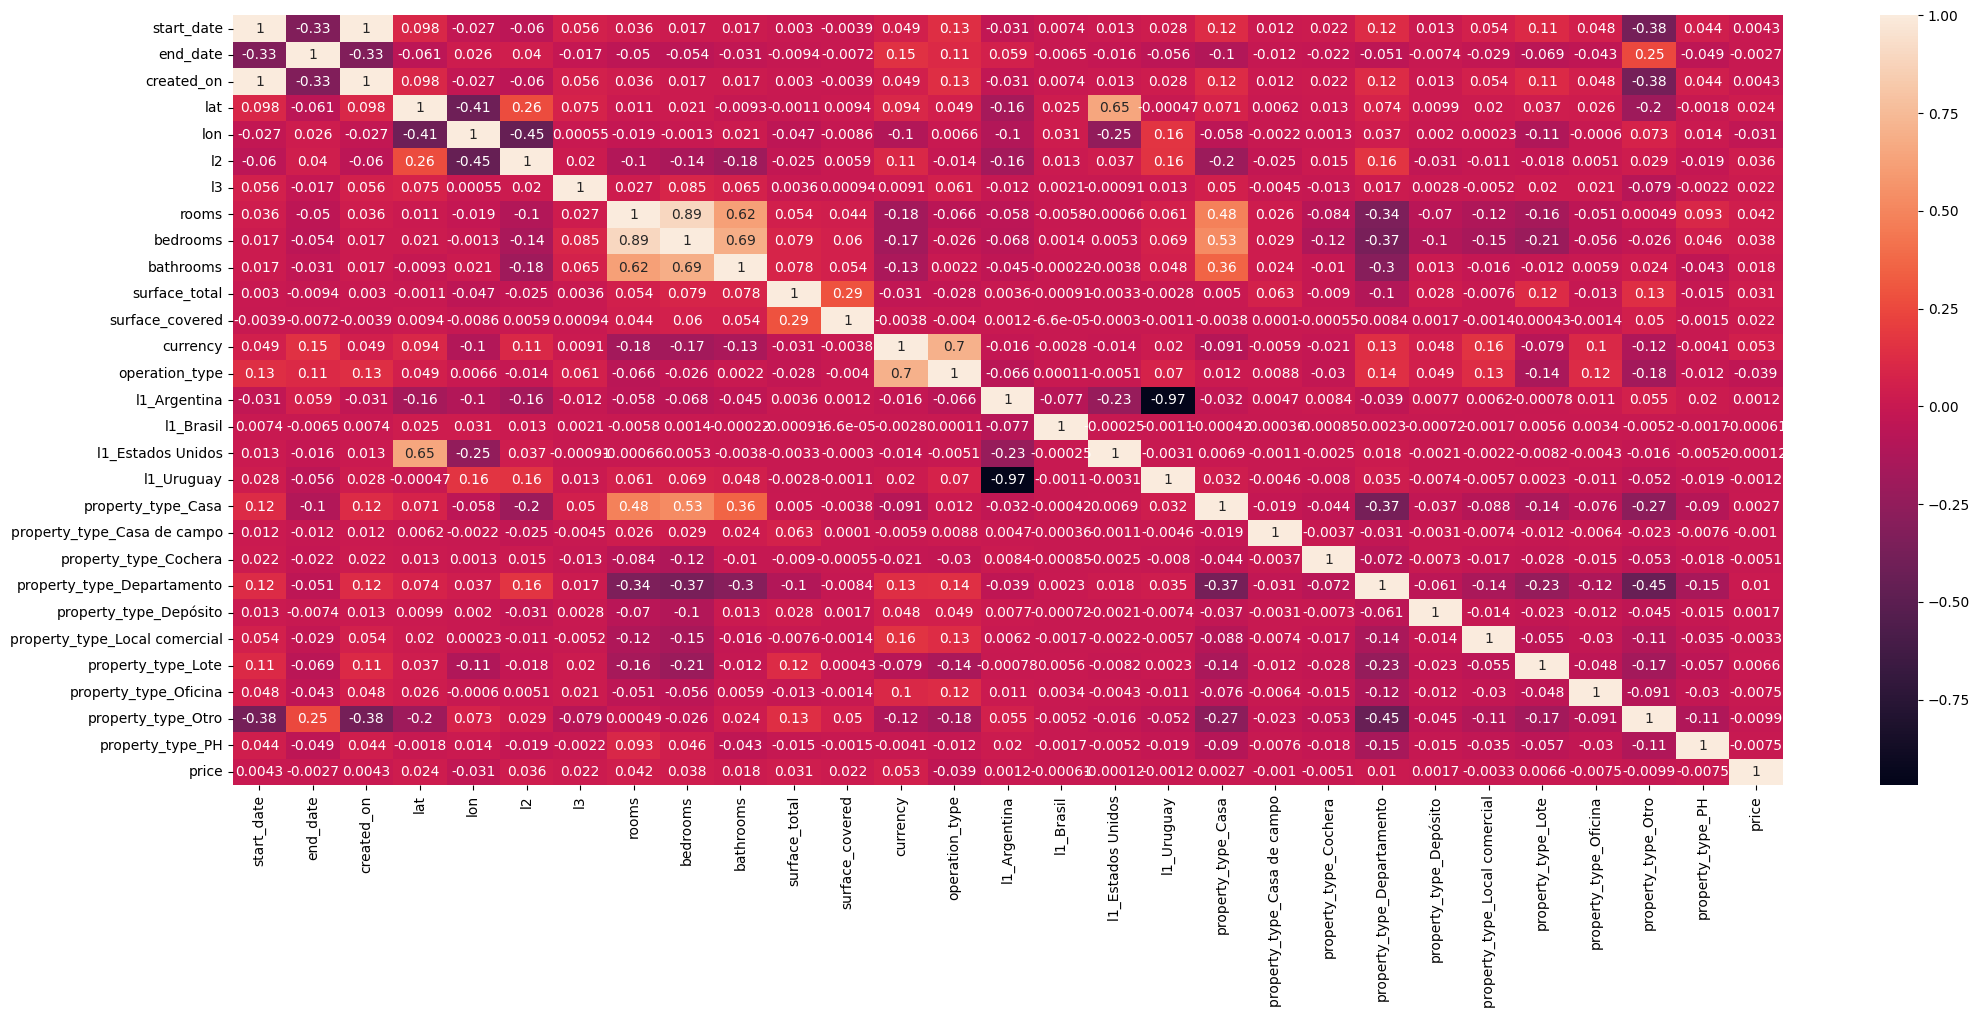

In [249]:
visualisation_corr_X_val = X_val.copy()
visualisation_corr_X_val['price'] = y_val

visualization_correlation(visualisation_corr_X_val)

Datele în mare parte nu au o corelție lineară

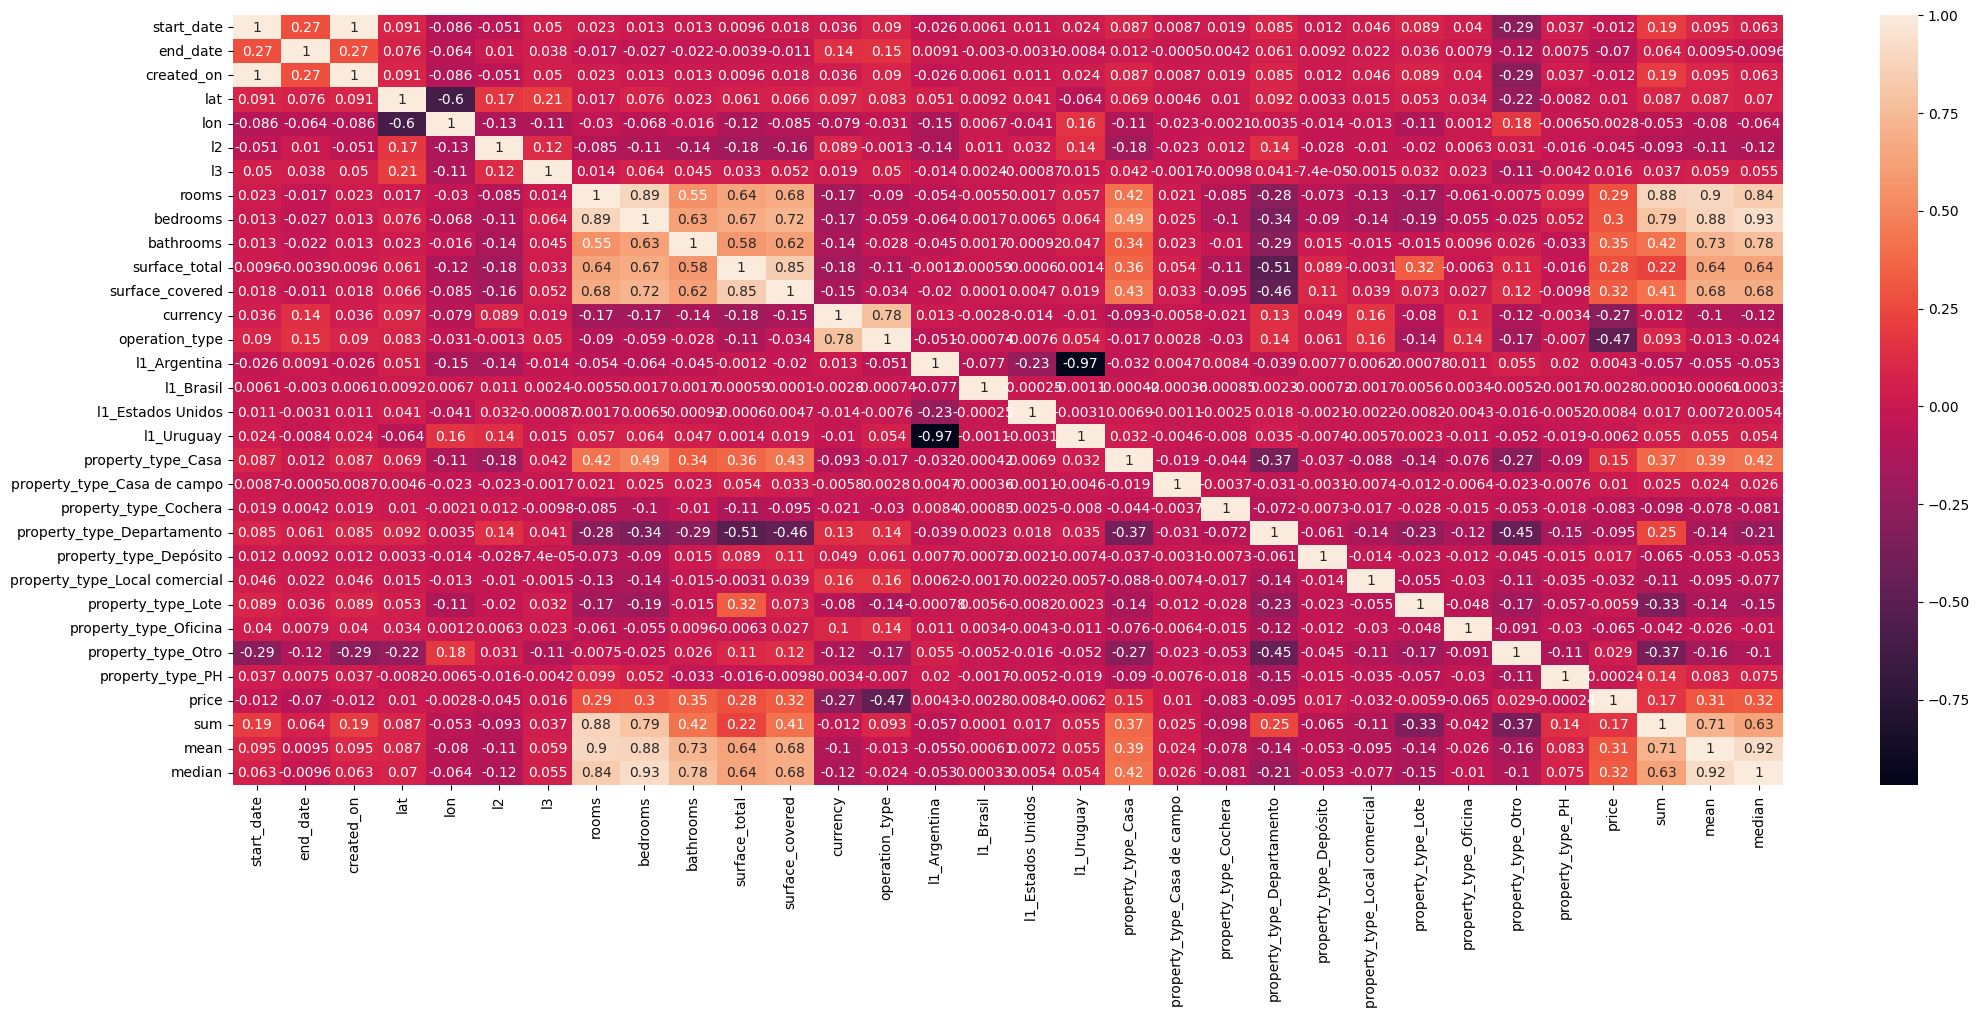

In [250]:
visualisation_corr_X_val = X_val.copy()
visualisation_corr_X_val['price'] = y_val

visualisation_corr_X_val = pd.DataFrame(pd.concat(
        [
            visualisation_corr_X_val, 
            visualisation_corr_X_val[['rooms', 'bedrooms', 'bathrooms']].sum(axis=1),
            visualisation_corr_X_val[['rooms', 'bedrooms', 'bathrooms']].mean(axis=1),
            visualisation_corr_X_val[['rooms', 'bedrooms', 'bathrooms']].median(axis=1)
        ], 
        axis=1  
    ).values,
    columns=list(visualisation_corr_X_val.columns.values)+['sum', 'mean', 'median']
)

visualization_correlation(visualisation_corr_X_val, method='kendall')

Mediana pentru rooms, bedrooms si bathrooms compreseaza intr-o coloană datele și păstrează informația utililă. Din perspectiva că în loc de 3 coloane face 1, va fi mai efecient pentru un model ML.
Și pe lângă că păstrează infomația, ea elimină o parte majoră de valori nule

In [251]:
rooms = ['rooms', 'bedrooms', 'bathrooms']

X_val[rooms].median(axis=1).info()

<class 'pandas.core.series.Series'>
Index: 143007 entries, 153492 to 683726
Series name: None
Non-Null Count   Dtype  
--------------   -----  
118626 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [252]:
X_val[rooms].info()

<class 'pandas.core.frame.DataFrame'>
Index: 143007 entries, 153492 to 683726
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rooms      75259 non-null   float64
 1   bedrooms   66103 non-null   float64
 2   bathrooms  111462 non-null  float64
dtypes: float64(3)
memory usage: 4.4 MB


In [253]:
X_val['rooms'] = X_val[rooms].median(axis=1)
X_val = X_val.drop(['bedrooms', 'bathrooms'], axis=1)

In [254]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143007 entries, 153492 to 683726
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     143007 non-null  datetime64[ns]
 1   end_date                       143007 non-null  datetime64[ns]
 2   created_on                     143007 non-null  datetime64[ns]
 3   lat                            121492 non-null  float64       
 4   lon                            121358 non-null  float64       
 5   l2                             143007 non-null  int8          
 6   l3                             143007 non-null  int8          
 7   rooms                          118626 non-null  float64       
 8   surface_total                  53203 non-null   float64       
 9   surface_covered                53506 non-null   float64       
 10  currency                       143007 non-null  int64         
 11  

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

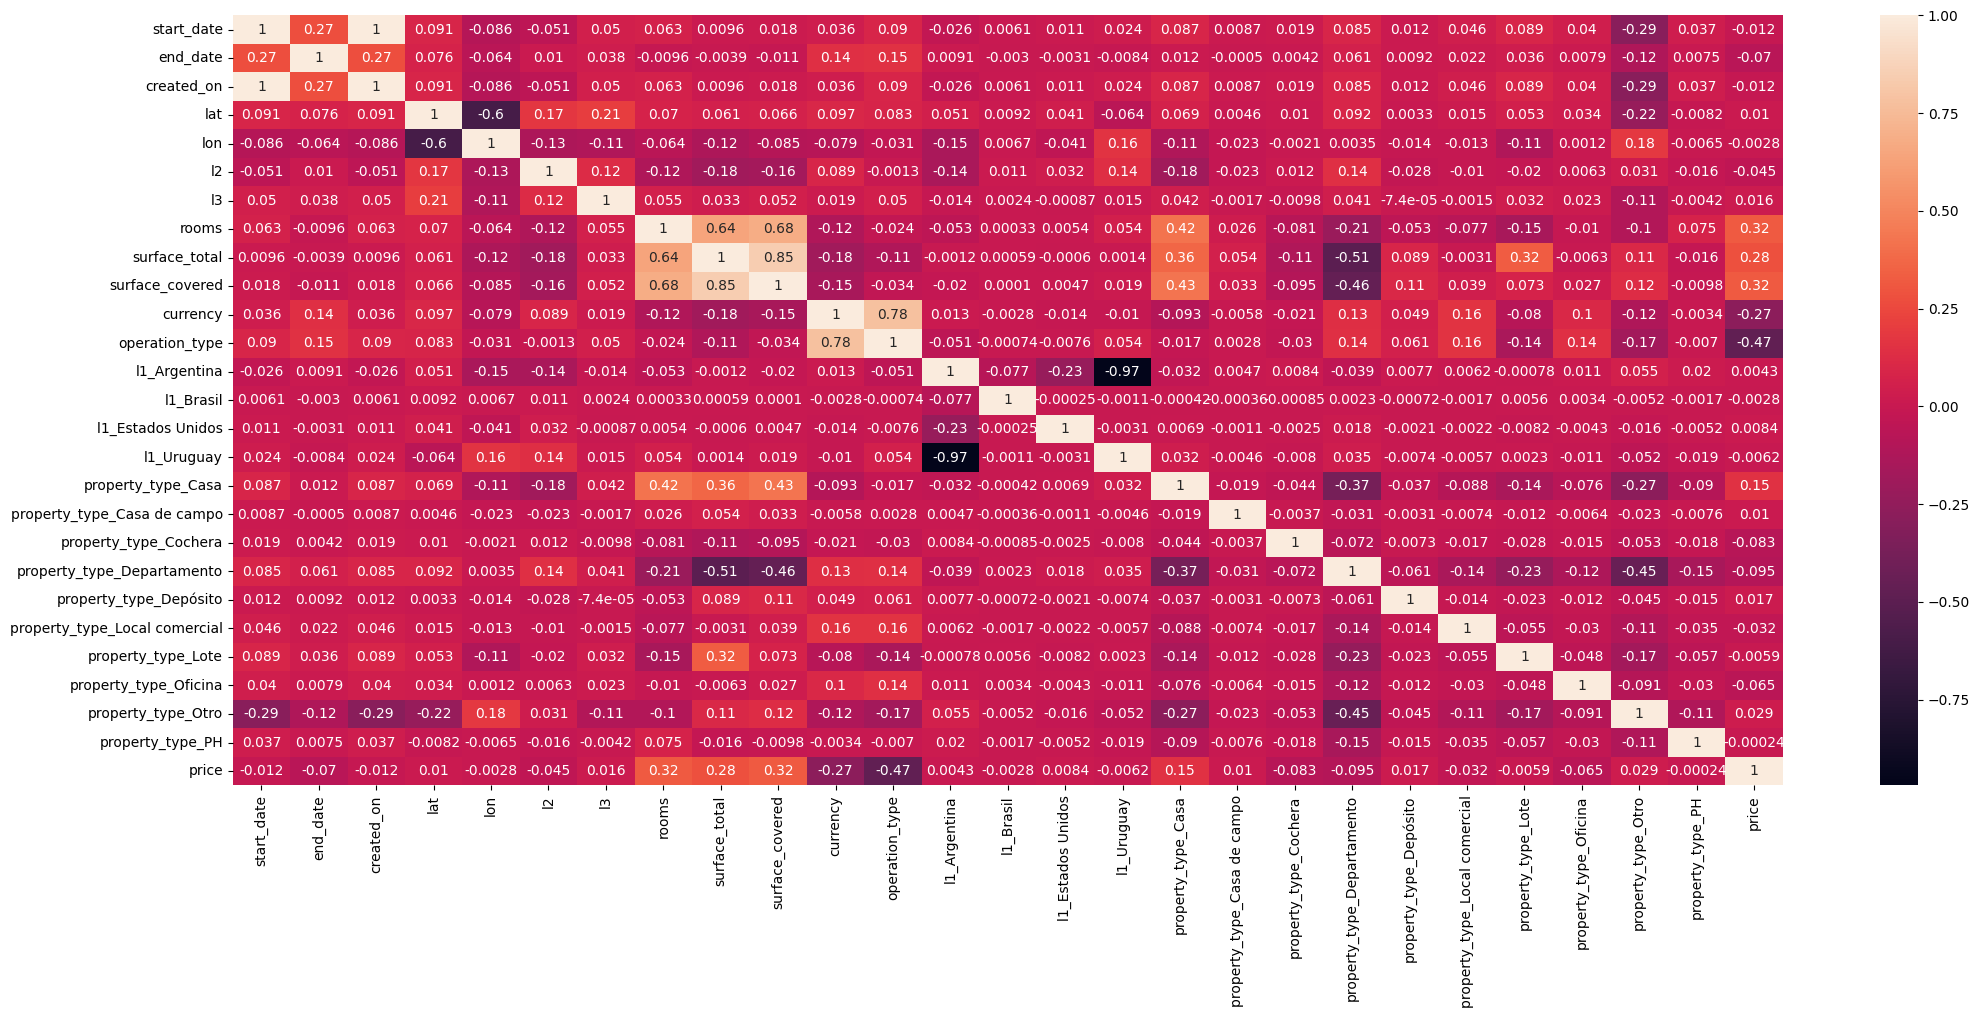

In [256]:
visualisation_corr_X_val = X_val.copy()
visualisation_corr_X_val['price'] = y_val

visualization_correlation(visualisation_corr_X_val, annot=True, method='kendall')

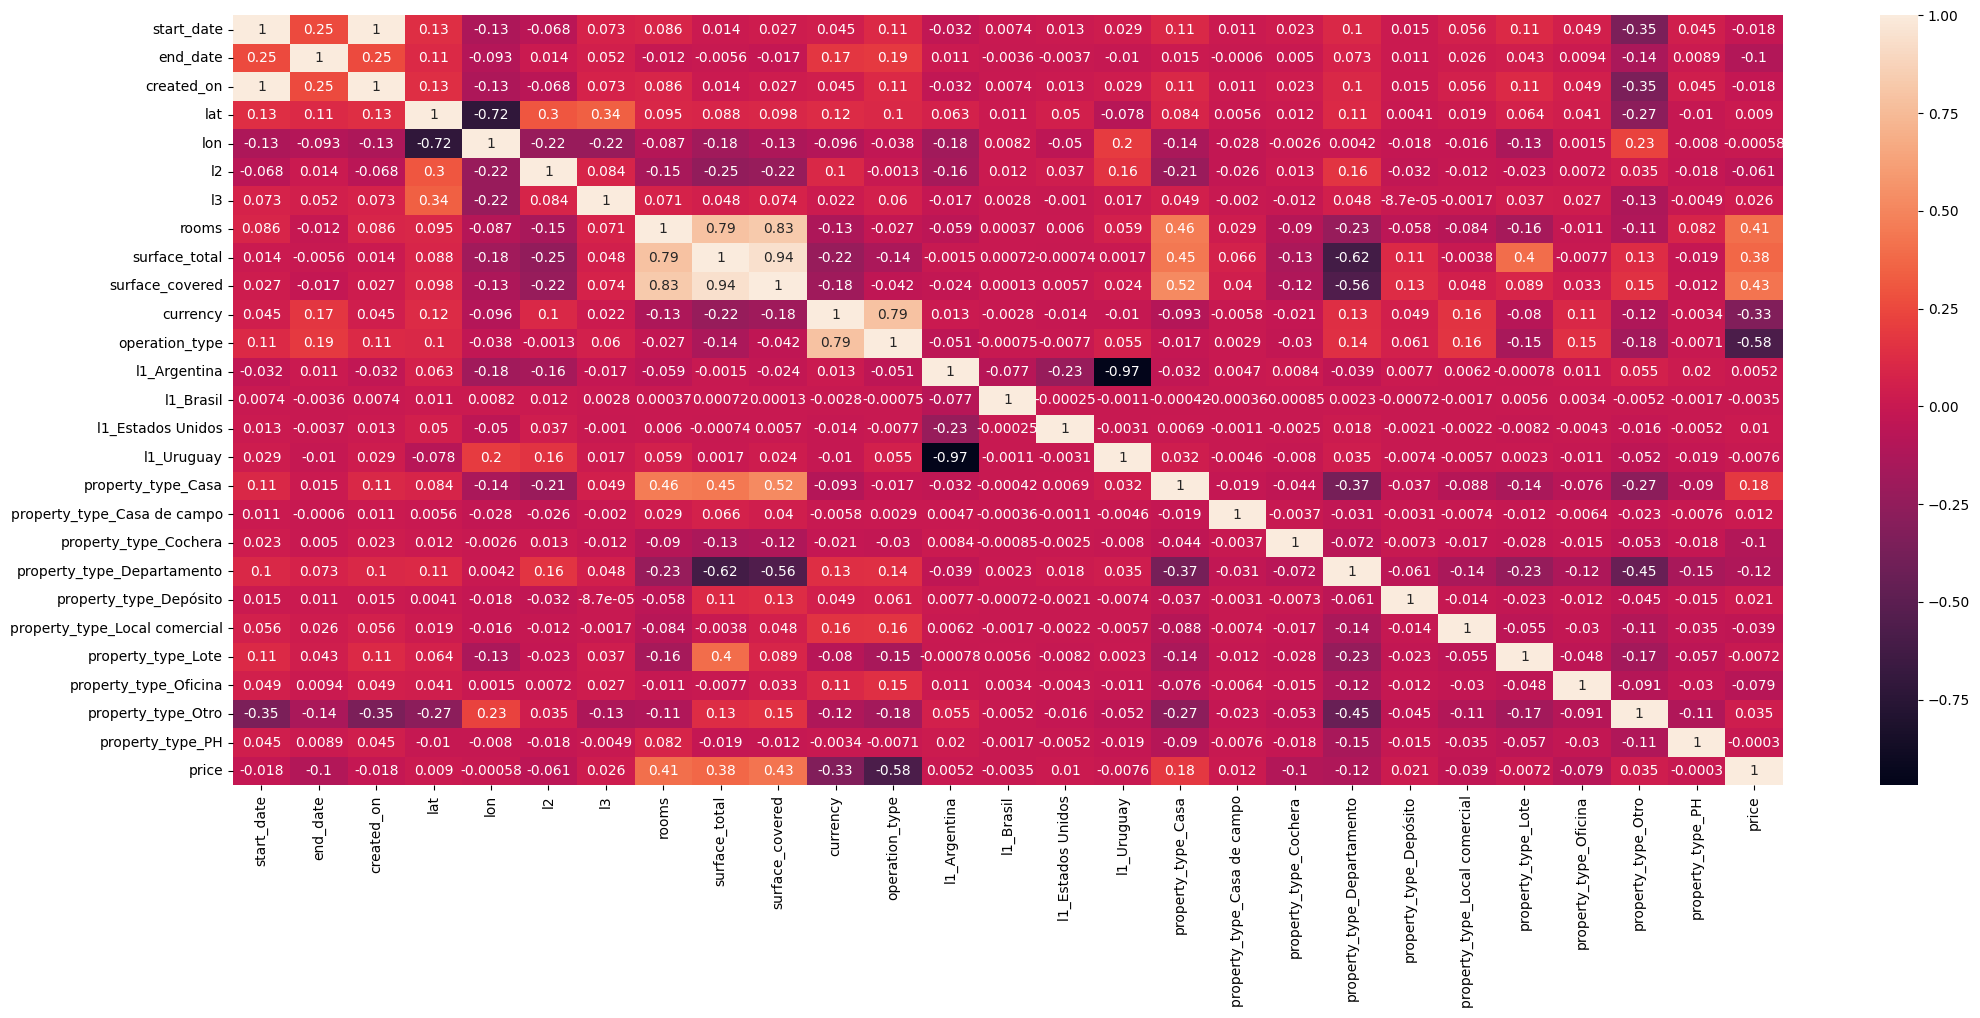

In [257]:
visualization_correlation(visualisation_corr_X_val, annot=True, method='spearman')

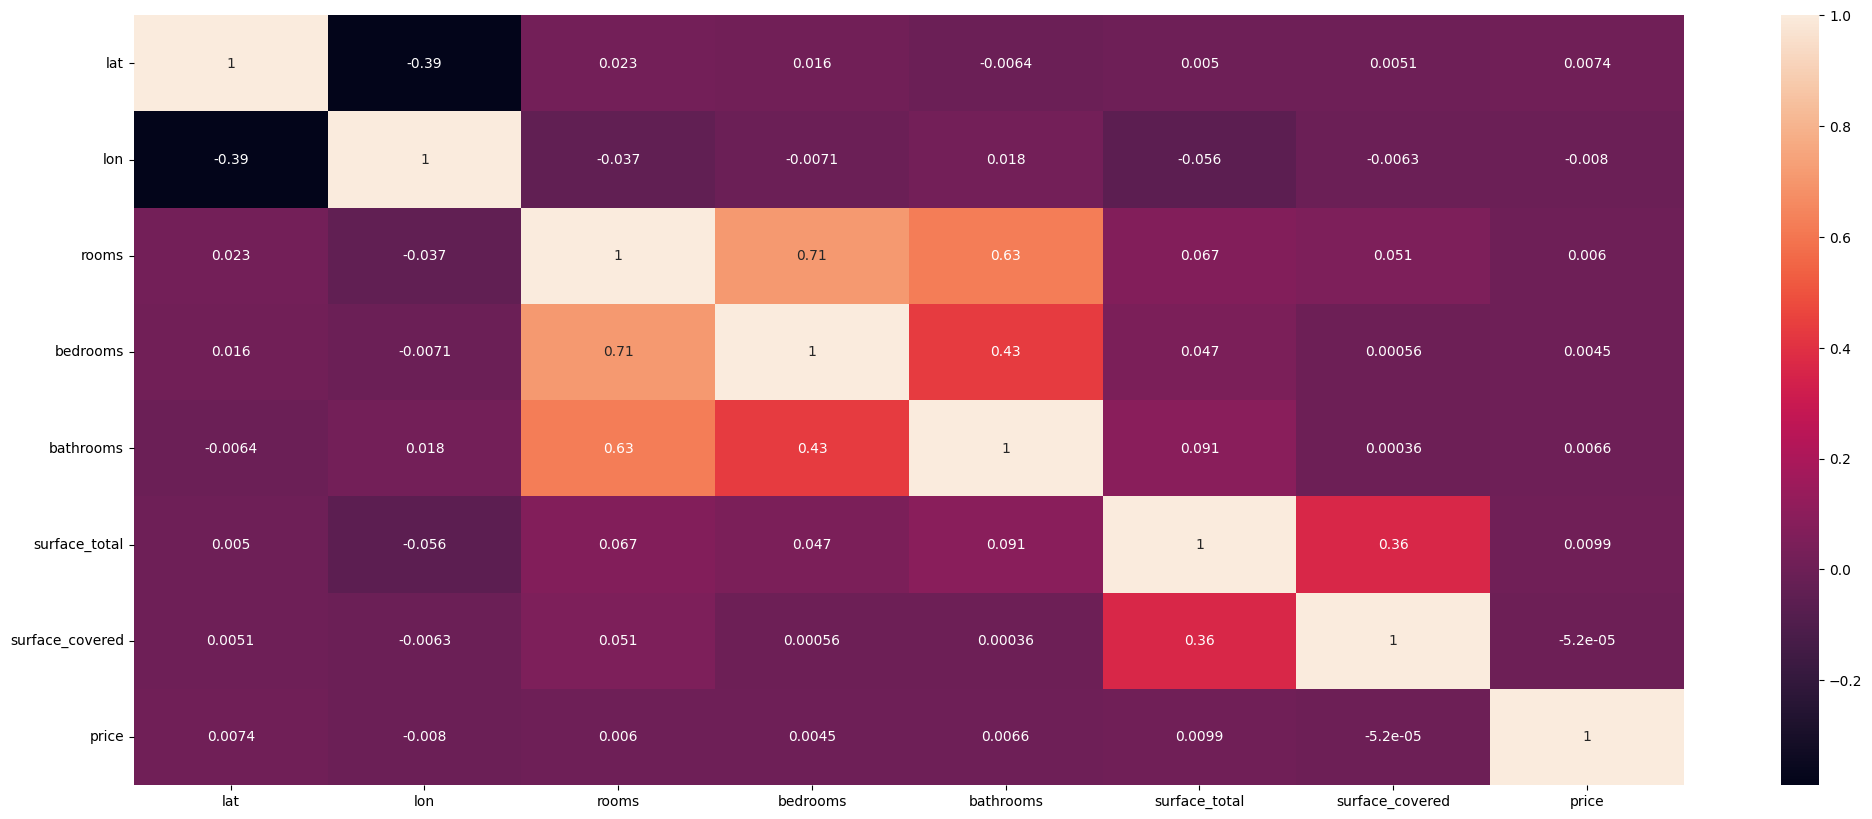

In [258]:
visualisation_corr_X_val = df.copy()[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

visualization_correlation(visualisation_corr_X_val, annot=True)

După corelație pot observa că practic toate coloanele nu au o corelație semnificativă cu coloana țină `price`, cel mai semnificativ dar tot minor este numarul de dormitoare si cameri

Aș observa că `property_type` are o corelație semnificativă cu coloanele `rooms`, `bedrooms` și `bathrooms`, care au  valori lipsă majore, dar `property_type` e full completă, deci pot prezice valorile nule din acestă perspectivă pentru coloanele cu cămeri.

In [259]:
visualisation_corr_X_val.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.389202,0.022676,0.016123,-0.006419,0.005024,0.005126,0.007371
lon,-0.389202,1.000000,-0.036908,-0.007063,0.018136,-0.055810,-0.006310,-0.008021
rooms,0.022676,-0.036908,1.000000,0.709315,0.625171,0.066871,0.051034,0.006026
bedrooms,0.016123,-0.007063,0.709315,1.000000,0.431870,0.047236,0.000562,0.004452
bathrooms,-0.006419,0.018136,0.625171,0.431870,1.000000,0.091033,0.000355,0.006601
surface_total,0.005024,-0.055810,0.066871,0.047236,0.091033,1.000000,0.360716,0.009886
surface_covered,0.005126,-0.006310,0.051034,0.000562,0.000355,0.360716,1.000000,-0.000052
price,0.007371,-0.008021,0.006026,0.004452,0.006601,0.009886,-0.000052,1.000000


In [260]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143007 entries, 153492 to 683726
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     143007 non-null  datetime64[ns]
 1   end_date                       143007 non-null  datetime64[ns]
 2   created_on                     143007 non-null  datetime64[ns]
 3   lat                            121492 non-null  float64       
 4   lon                            121358 non-null  float64       
 5   l2                             143007 non-null  int8          
 6   l3                             143007 non-null  int8          
 7   rooms                          118626 non-null  float64       
 8   surface_total                  53203 non-null   float64       
 9   surface_covered                53506 non-null   float64       
 10  currency                       143007 non-null  int64         
 11  

In [261]:
X_val['lat'].info()

<class 'pandas.core.series.Series'>
Index: 143007 entries, 153492 to 683726
Series name: lat
Non-Null Count   Dtype  
--------------   -----  
121492 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [262]:
X_val["lat"] = X_val["lat"].fillna(X_val["lat"].median())
X_val["lon"] = X_val["lon"].fillna(X_val["lon"].median())


In [263]:
X_val

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,surface_total,surface_covered,currency,operation_type,l1_Argentina,l1_Brasil,l1_Estados Unidos,l1_Uruguay,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
153492,2020-06-11,2020-06-21 00:00:00.000000000,2020-06-11,-34.612754,-58.445380,1,37,3.0,208.0,145.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
765489,2020-09-02,2020-09-10 00:00:00.000000000,2020-09-02,-34.663544,-58.757103,1,19,1.0,35.0,35.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
881637,2020-12-12,1969-12-31 23:59:59.999999999,2020-12-12,-34.564850,-58.466423,5,6,2.0,175.0,49.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
717120,2020-05-22,2020-05-26 00:00:00.000000000,2020-05-22,-34.596225,-58.412979,5,25,1.5,NaN,NaN,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
945151,2021-01-06,1969-12-31 23:59:59.999999999,2021-01-06,-38.935762,-68.121459,7,20,2.0,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558445,2020-10-22,1969-12-31 23:59:59.999999999,2020-10-22,-34.503638,-58.510324,0,38,2.0,47.0,47.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146165,2020-09-07,2020-11-16 00:00:00.000000000,2020-09-07,-34.612754,-58.445380,5,25,1.0,41.0,37.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
392080,2020-10-29,2021-01-25 00:00:00.000000000,2020-10-29,-32.937241,-60.648834,8,31,1.0,32.0,32.0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
669591,2020-06-09,1969-12-31 23:59:59.999999999,2020-06-09,-38.012451,-57.602266,3,18,NaN,NaN,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [264]:
def show_boxplots(df: pd.DataFrame, rows: int=3, cols: int=3):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, cols*3))

    for i in tqdm(range(cols)):
        for i2, c in tqdm(enumerate(df.iloc[:, cols*i:cols*(i+1)].columns)):
            axs[i2, i].boxplot(df[c])
            axs[i2, i].set_title(c)
    
    plt.tight_layout()
    plt.show()

5it [00:00, 39.89it/s]00:00<?, ?it/s]
5it [00:00, 25.84it/s]00:00<00:00,  6.97it/s]
5it [00:00, 24.81it/s]00:00<00:00,  5.41it/s]
5it [00:00, 26.59it/s]00:00<00:00,  5.00it/s]
5it [00:00, 39.11it/s]00:00<00:00,  4.97it/s]
100%|██████████| 5/5 [00:00<00:00,  5.44it/s]


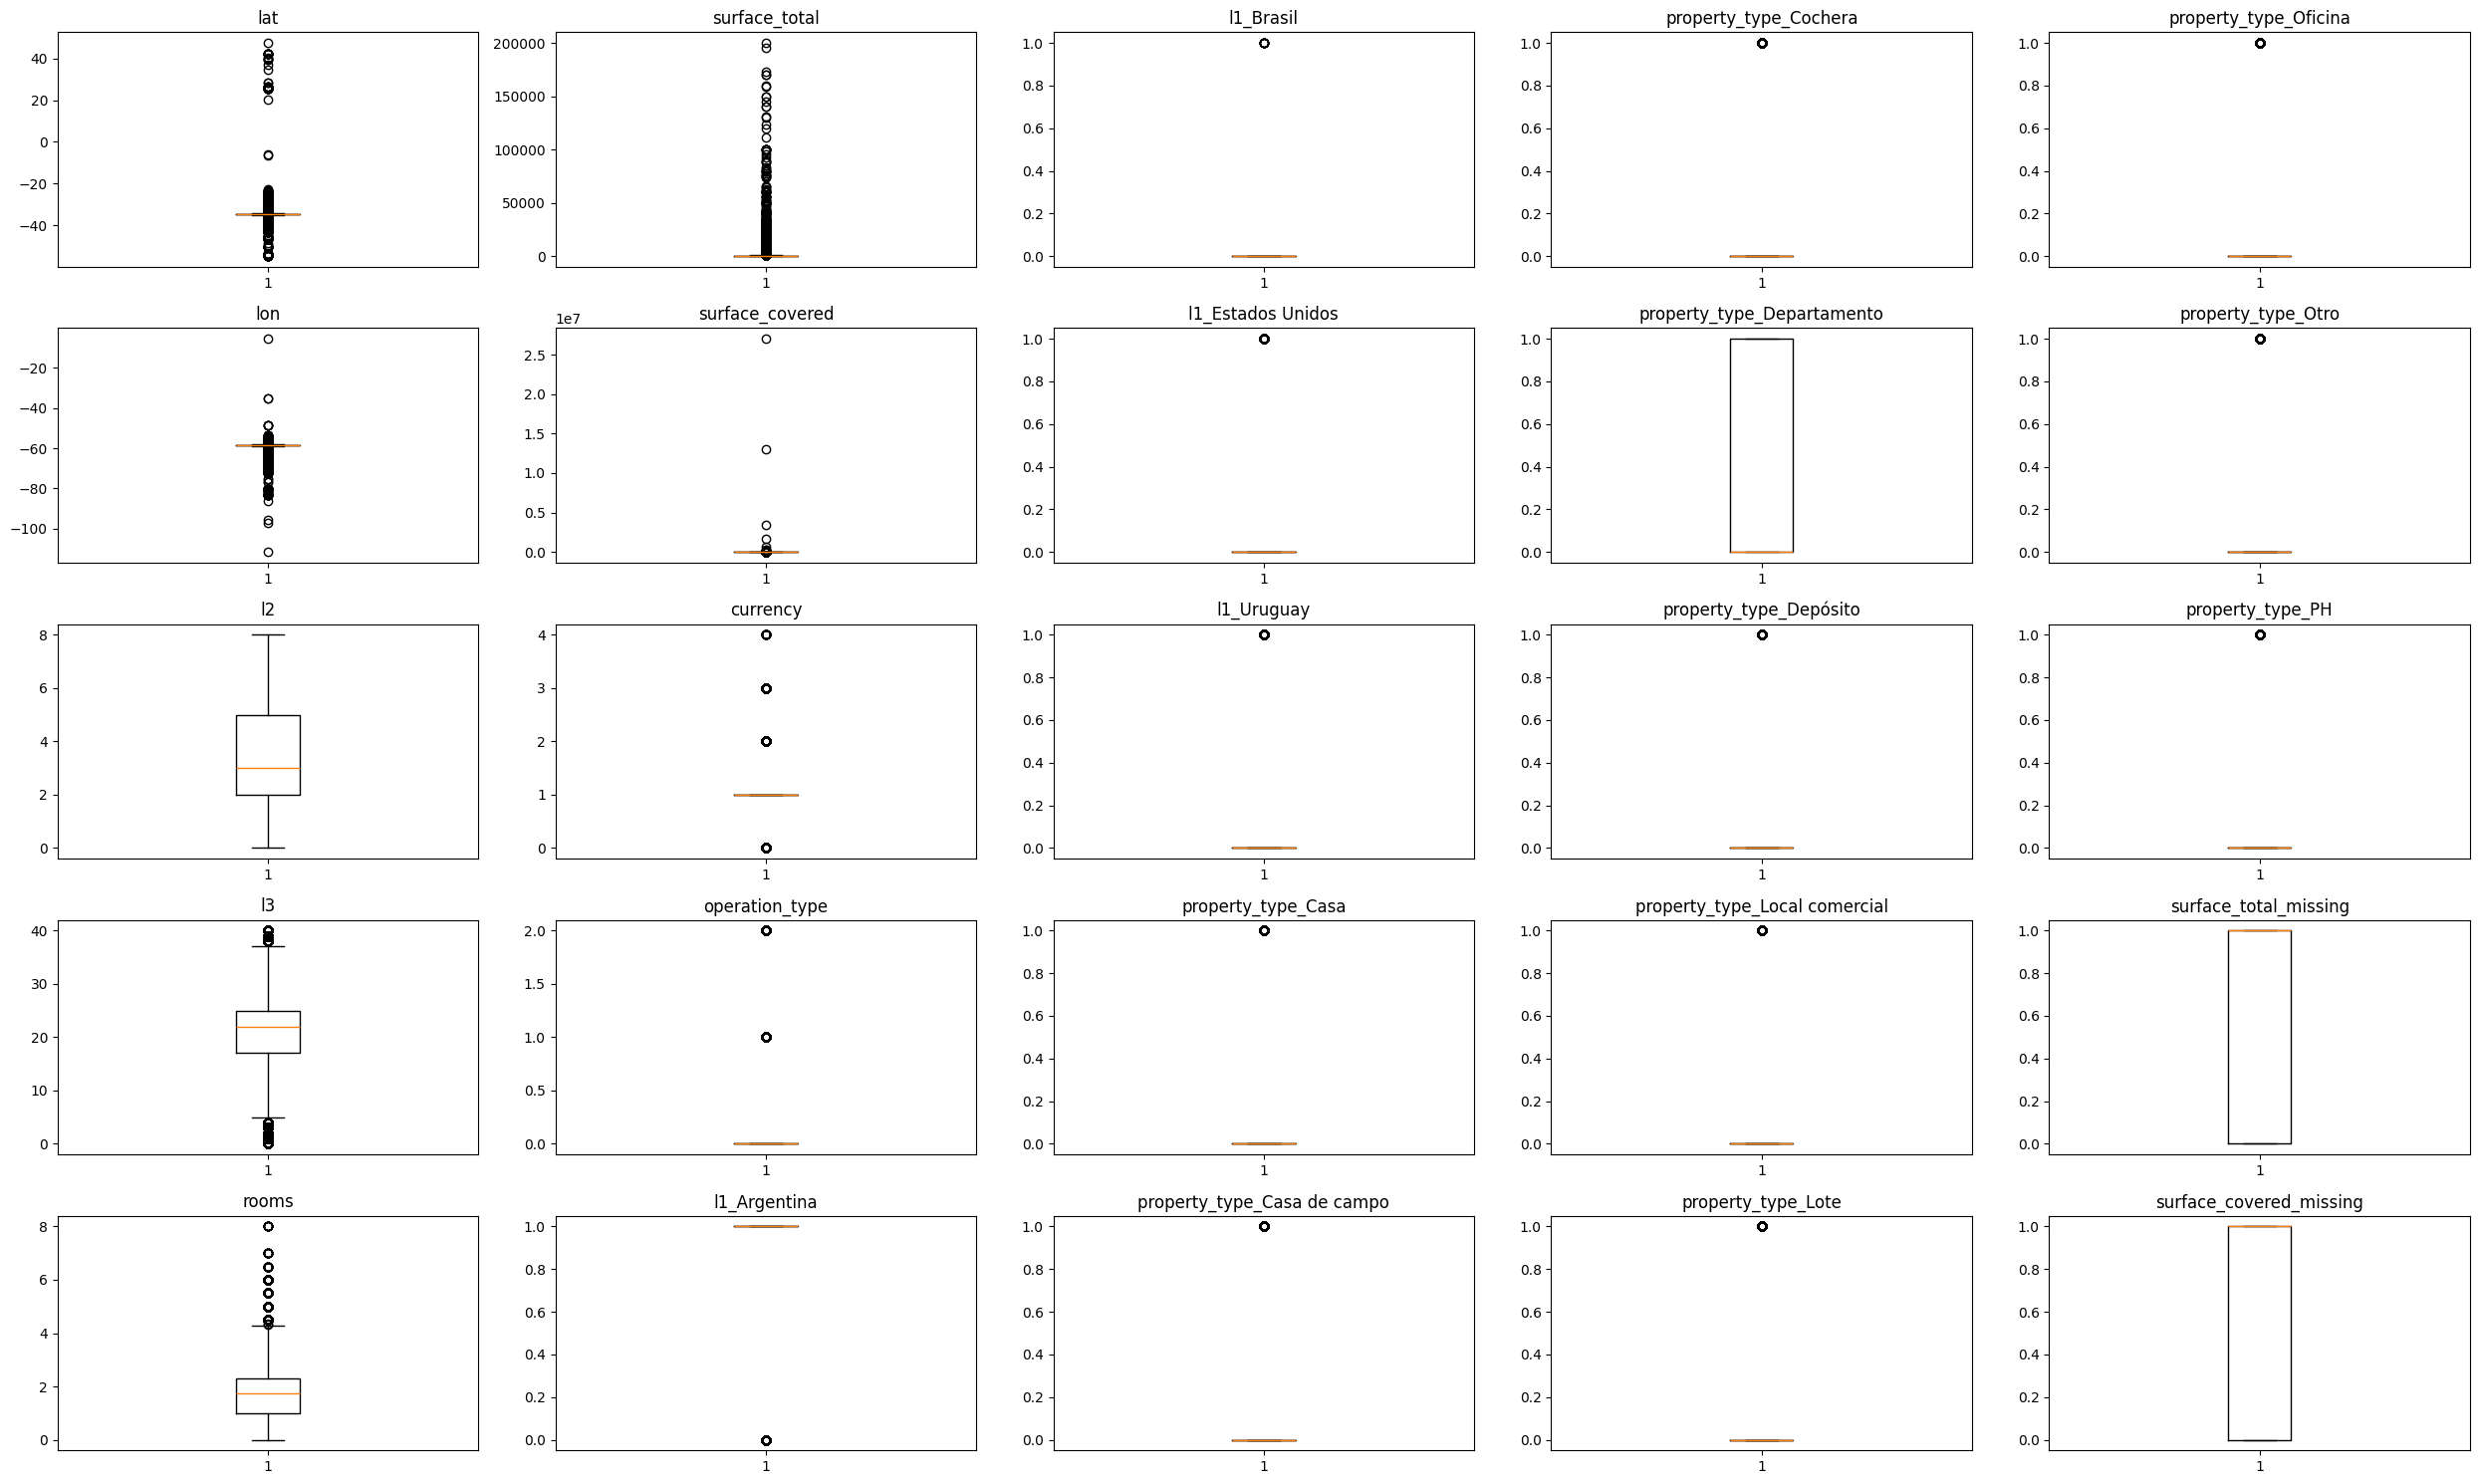

In [302]:
show_boxplots(X_val.iloc[:, 3:], rows=5, cols=5)

C:\Users\Home\AppData\Local\Temp\ipykernel_10360\460452639.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs.boxplot(X_val[cols], labels=cols)


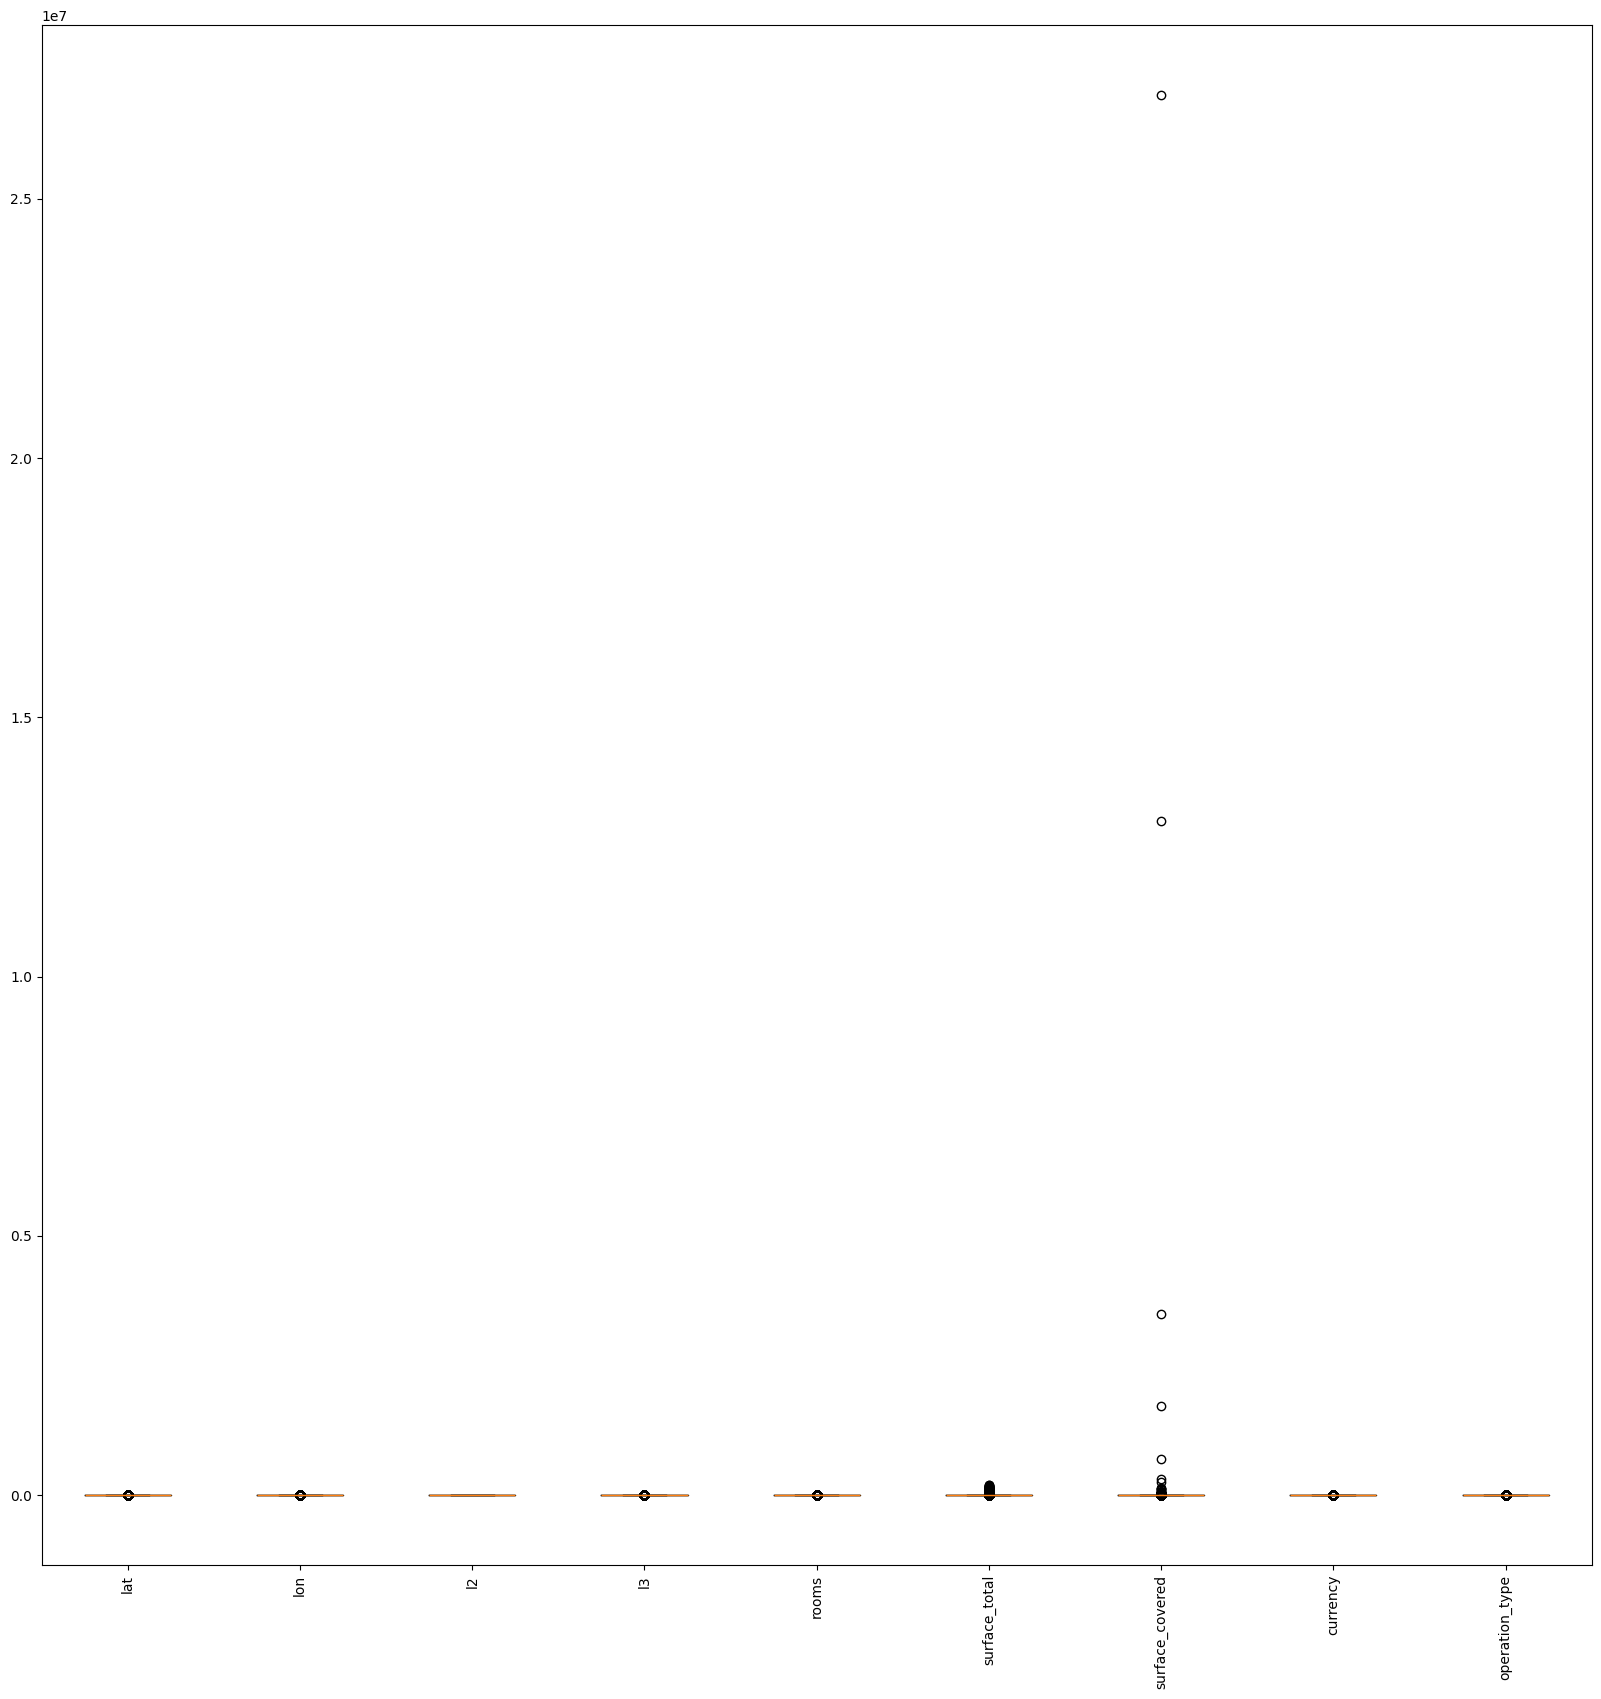

In [301]:
fig, axs = plt.subplots(1, 1, figsize=[20, 20])
cols = [col for col in X_val.columns[3:] if X_val[col].nunique() > 2]
axs.boxplot(X_val[cols], labels=cols)

plt.xticks(rotation=90)
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_10360\970324472.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs.boxplot(X_val.iloc[:2, 3:], labels=X_val.iloc[:, 3:].columns)


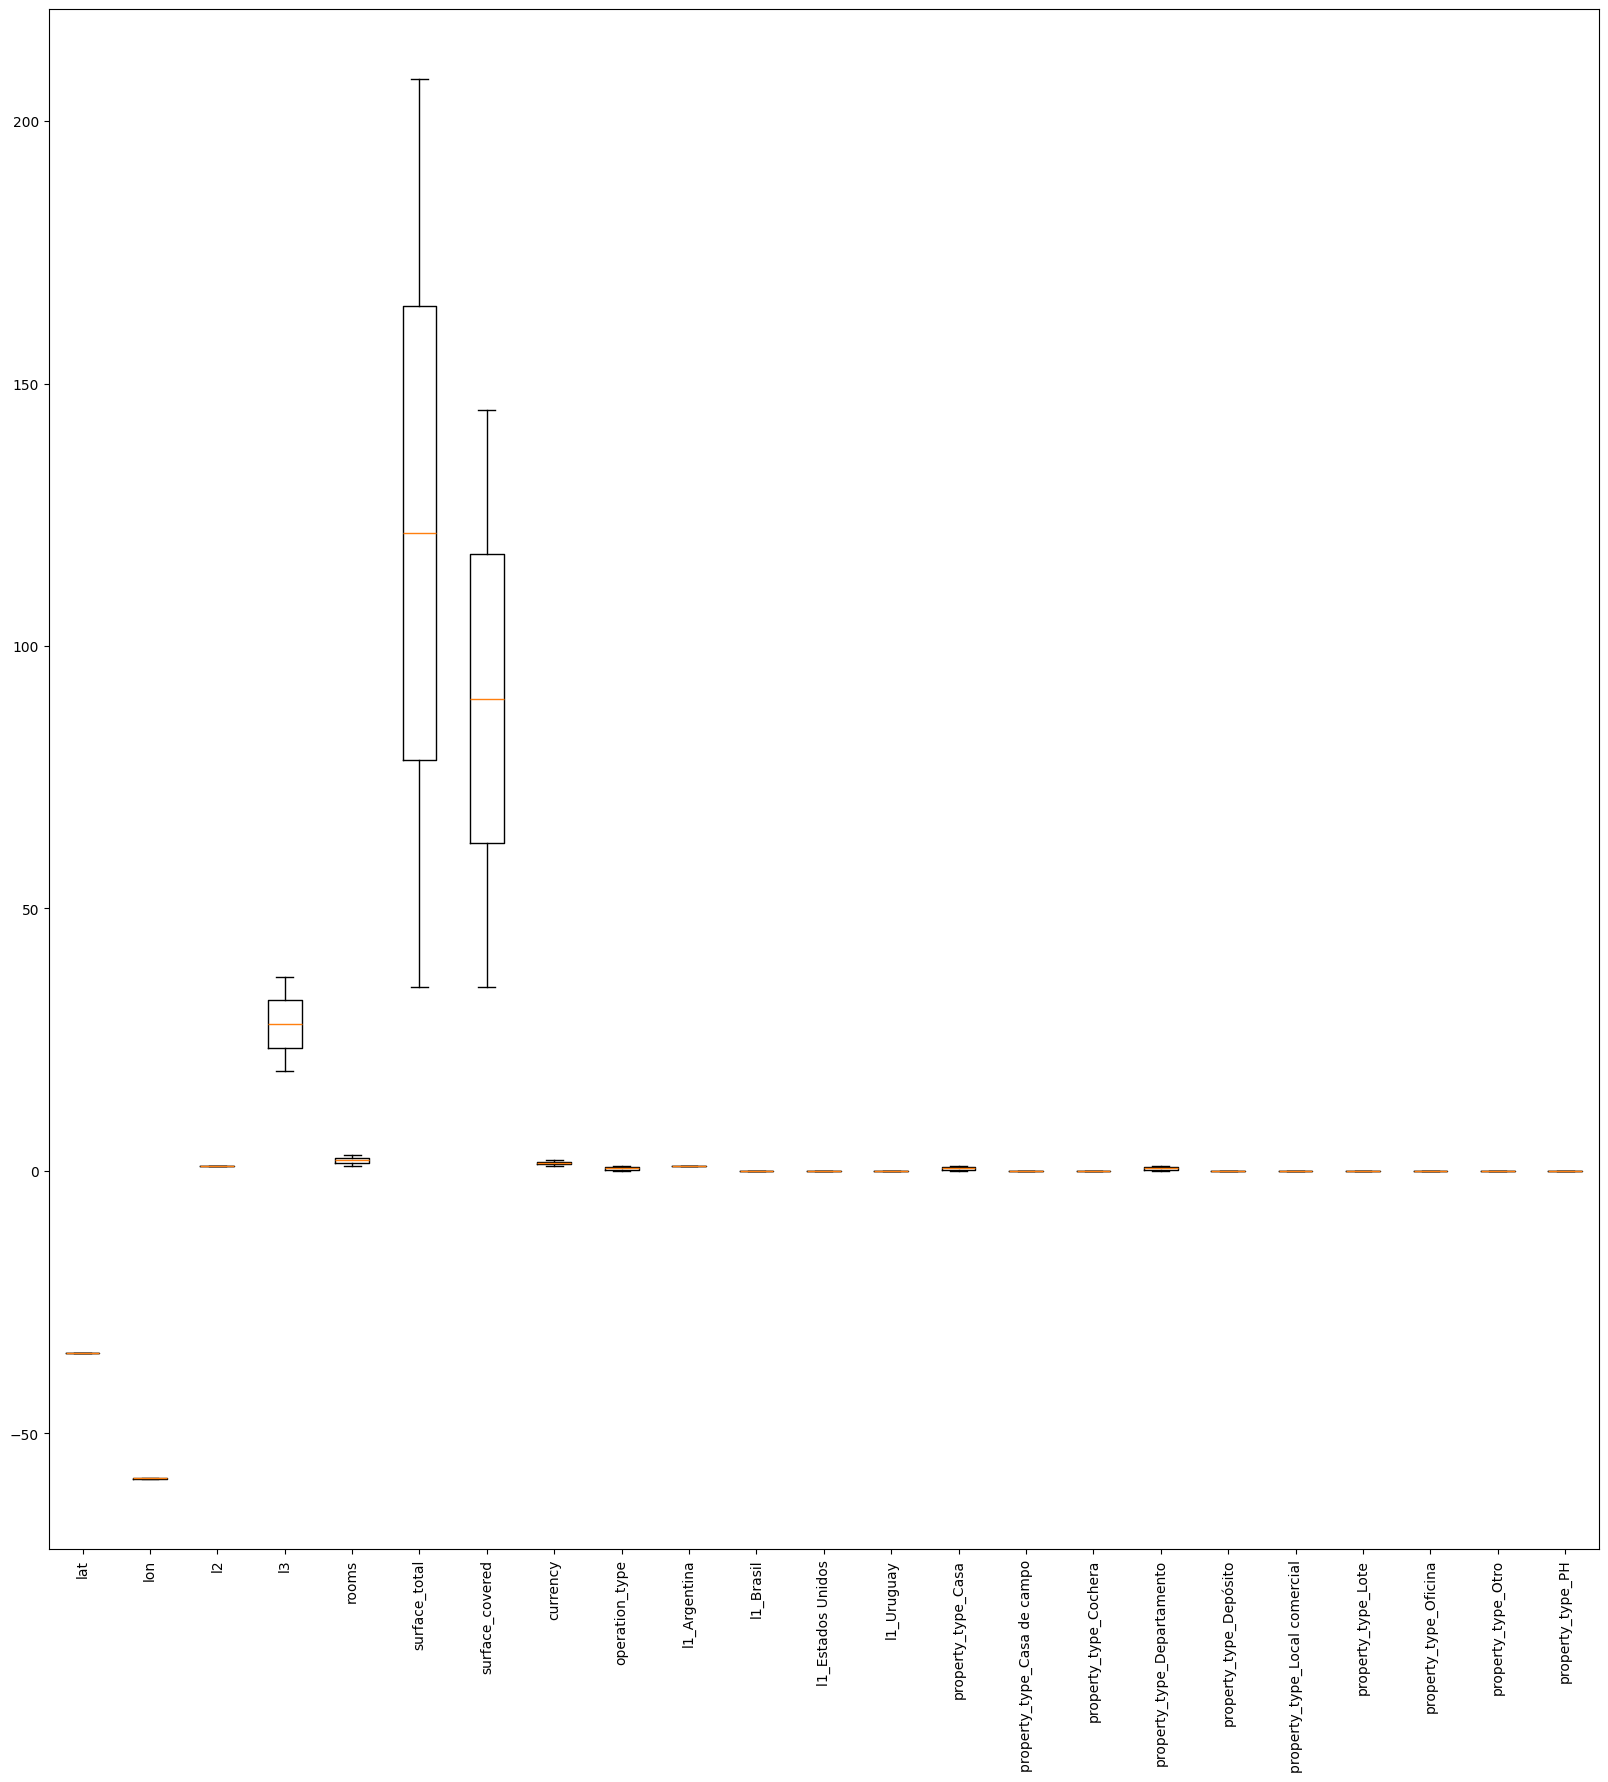

In [267]:
fig, axs = plt.subplots(1, 1, figsize=[20, 20])
axs.boxplot(X_val.iloc[:2, 3:], labels=X_val.iloc[:, 3:].columns)

plt.xticks(rotation=90)
plt.show()

In [268]:
def show_frequency(df: pd.DataFrame, rows: int=3, cols: int=3):
    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, cols*3))

    for i in tqdm(range(cols)):
        for i2, c in tqdm(enumerate(df.iloc[:, cols*i:cols*(i+1)].columns)):
            axs[i2, i].hist(df[c], bins=20)
            axs[i2, i].set_xlabel(c)
            axs[i2, i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

5it [00:00, 22.26it/s]00:00<?, ?it/s]
5it [00:00, 29.83it/s]00:00<00:00,  4.24it/s]
5it [00:00, 27.10it/s]00:00<00:00,  4.86it/s]
5it [00:00, 28.17it/s]00:00<00:00,  4.95it/s]
5it [00:00, 24.15it/s]00:00<00:00,  5.04it/s]
100%|██████████| 5/5 [00:01<00:00,  4.84it/s]


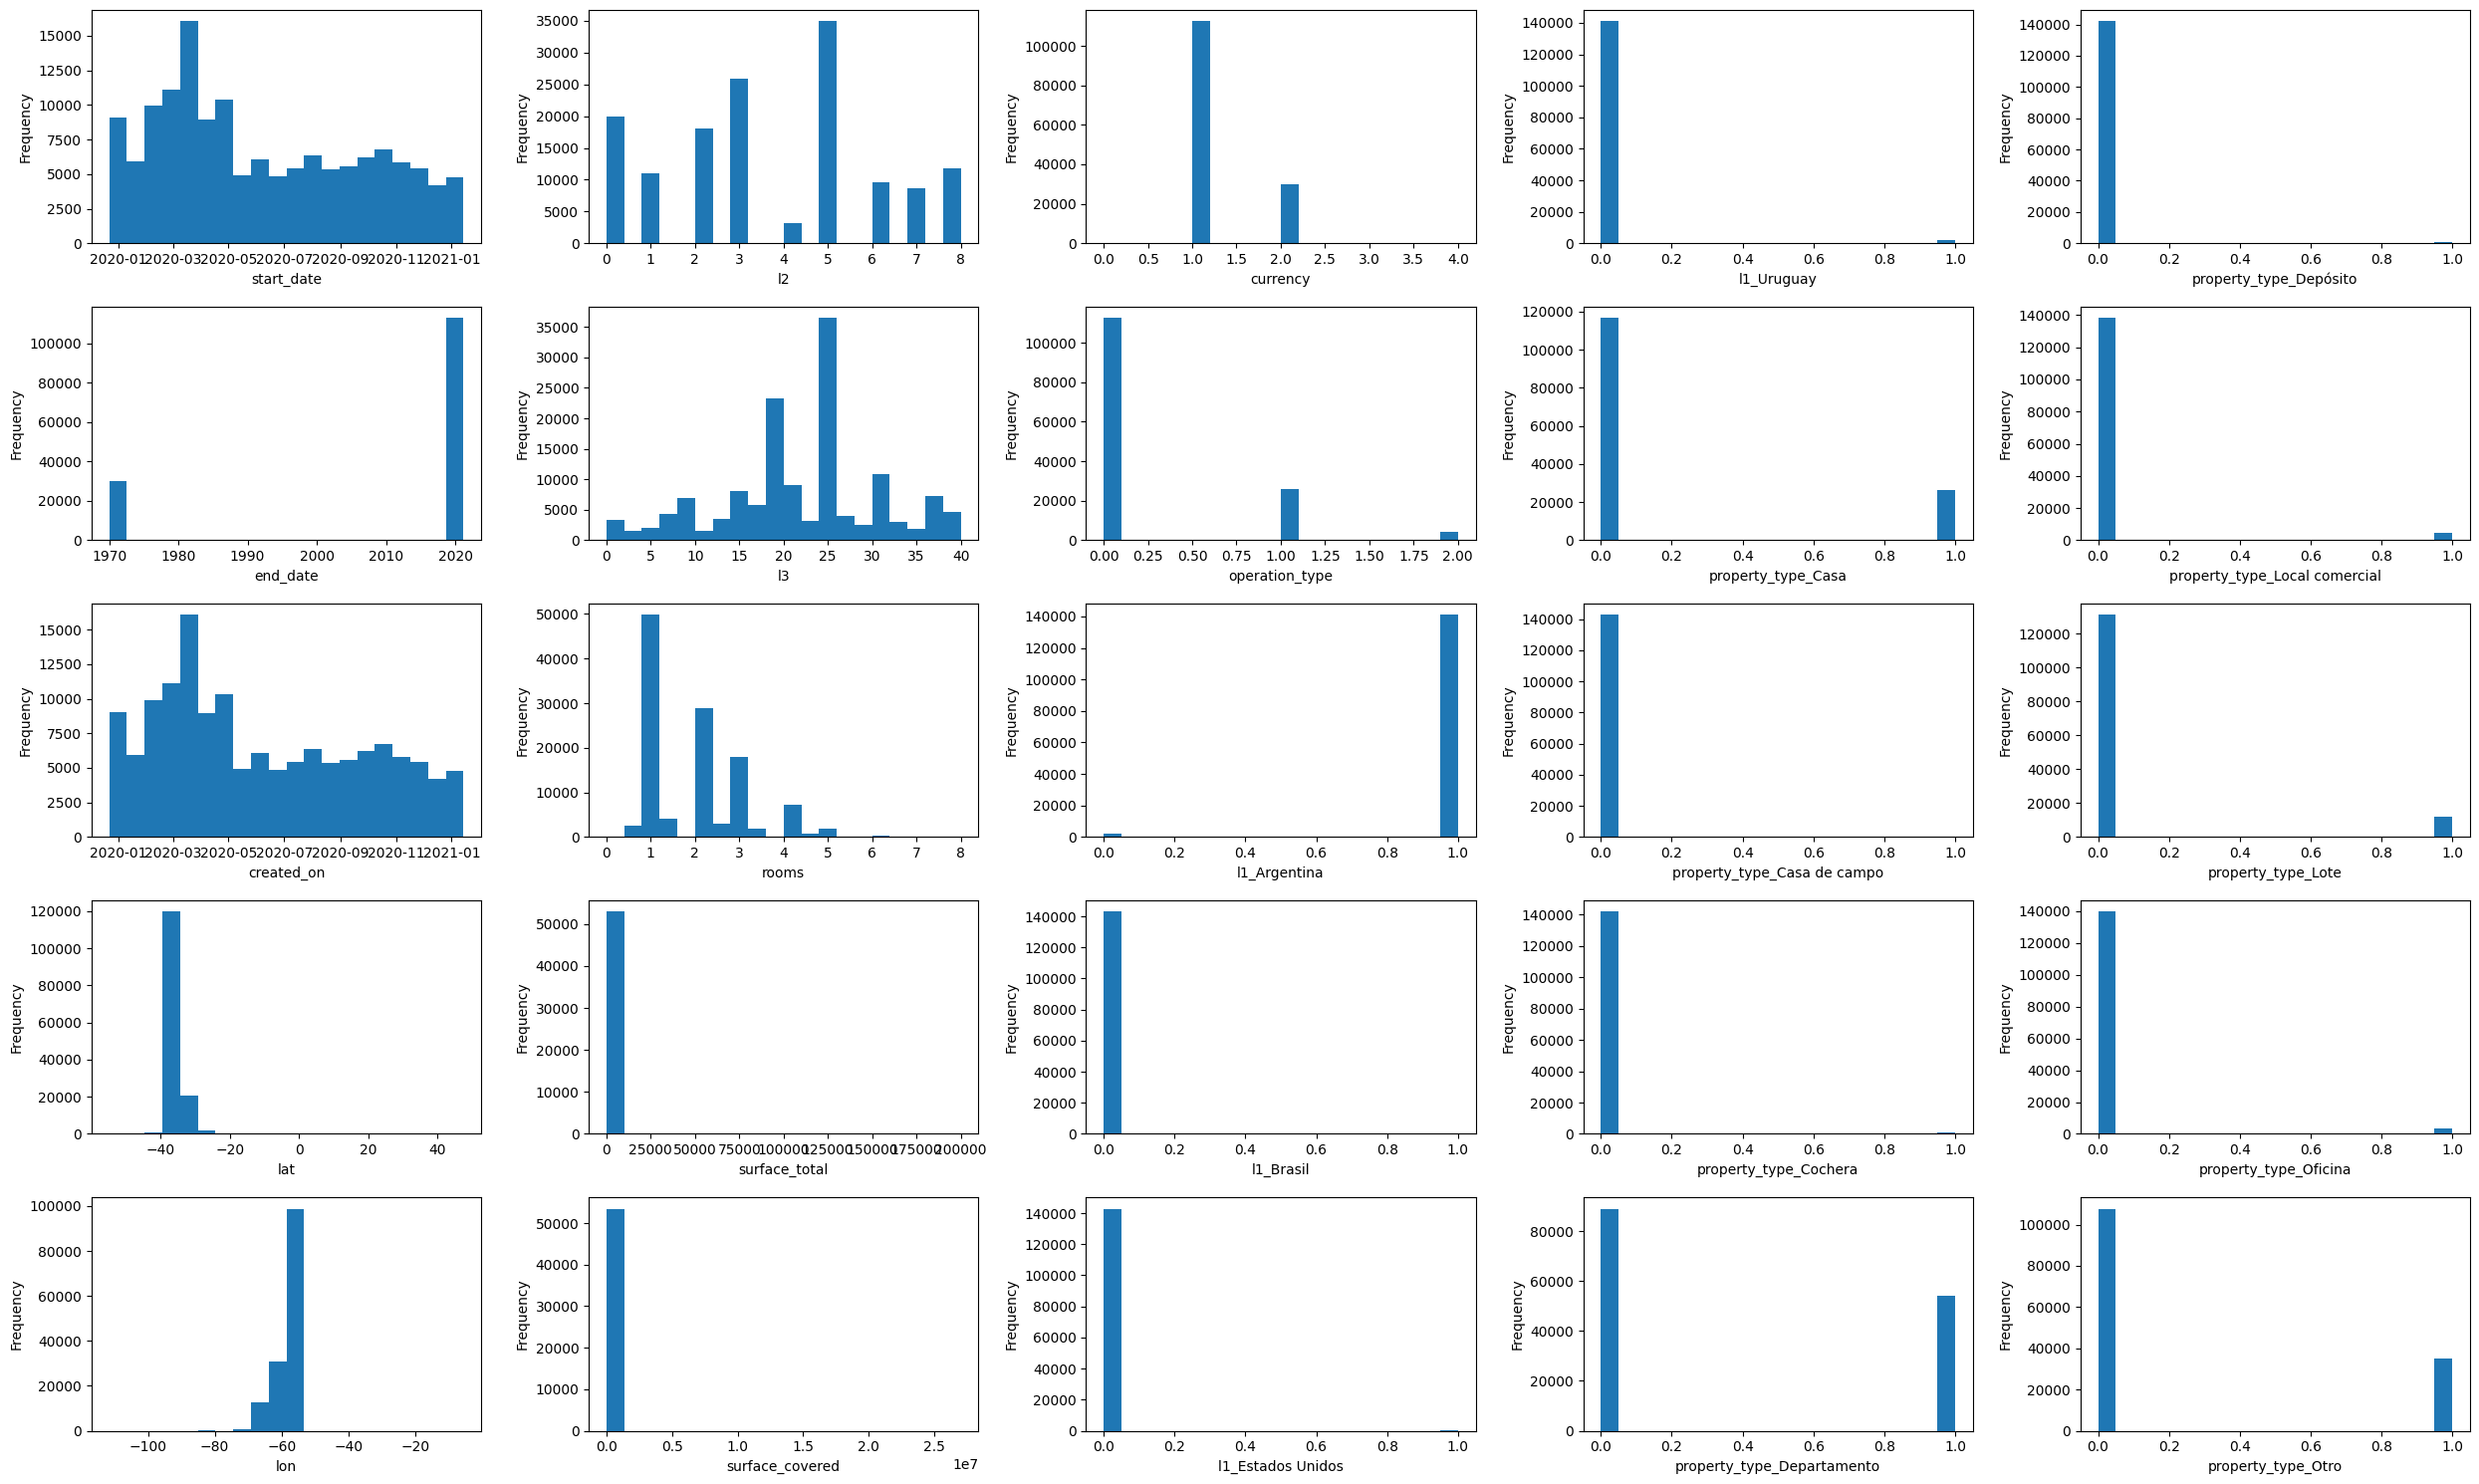

In [269]:
show_frequency(X_val, 5, 5)

In [270]:
X_val.describe()

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,surface_total,surface_covered,currency,operation_type,l1_Argentina,l1_Brasil,l1_Estados Unidos,l1_Uruguay,property_type_Casa,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
count,143007,143007,143007,143007.000000,143007.000000,143007.00000,143007.000000,118626.000000,53203.000000,5.350600e+04,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000,143007.000000
mean,2020-06-06 03:27:19.782667776,2009-10-28 13:42:05.943485184,2020-06-06 03:27:19.782667776,-34.791545,-59.088999,3.67438,21.275343,1.912068,464.403643,1.070632e+03,1.212074,0.244079,0.986155,0.000084,0.000741,0.013020,0.184236,0.001580,0.008566,0.377786,0.006084,0.033103,0.082527,0.024852,0.246498,0.034768
min,2019-12-22 00:00:00,1969-12-31 23:59:59.999999999,2019-12-22 00:00:00,-54.840886,-111.611617,0.00000,0.000000,0.000000,10.000000,-2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-08 00:00:00,2020-02-13 00:00:00,2020-03-08 00:00:00,-34.807844,-58.650818,2.00000,17.000000,1.000000,50.000000,4.500000e+01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-05-07 00:00:00,2020-04-28 00:00:00,2020-05-07 00:00:00,-34.612754,-58.445380,3.00000,22.000000,2.000000,90.000000,7.500000e+01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-09-08 00:00:00,2020-09-03 00:00:00,2020-09-08 00:00:00,-34.548963,-58.373188,5.00000,25.000000,3.000000,240.000000,1.550000e+02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021-01-14 00:00:00,2021-03-15 00:00:00,2021-01-14 00:00:00,47.545277,-5.490771,8.00000,40.000000,8.000000,200000.000000,2.700000e+07,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,NaN,NaN,2.690721,2.396235,2.42449,8.828006,1.070626,3889.905498,1.307039e+05,0.418465,0.496589,0.116850,0.009160,0.027215,0.113362,0.387678,0.039722,0.092156,0.484835,0.077760,0.178907,0.275168,0.155674,0.430974,0.183191


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              849189 non-null   float64
 6   lon              848255 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               946673 non-null   object 
 10  l4               239496 non-null   object 
 11  l5               5001 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            526423 non-null   float64
 14  bedrooms         466213 non-null   float64
 15  bathrooms        776733 non-null   float64
 16  surface_total    37

Inca odata verificam randurile, pentru care coloanele imporatante sunt valori nule

In [272]:
X_val[X_val['surface_covered'] < 0].shape

(1, 26)

In [273]:
df[df['surface_total'] < 0].shape

(1, 25)

In [274]:
X_val.loc[X_val['surface_total'] < 0, 'surface_total'] = 0
X_val.loc[X_val['surface_covered'] < 0, 'surface_covered'] = 0

In [275]:
df[df['surface_covered'] > df['surface_total']].shape

(5465, 25)

In [276]:
X_val[X_val['surface_covered'] > X_val['surface_total']].shape

(714, 26)

In [277]:
indexs = X_val[X_val['surface_covered'] > X_val['surface_total']].index
X_val = X_val.drop(indexs, axis=0)
y_val = y_val.drop(indexs, axis=0)
# X_val.loc[indexs, 'surface_covered'] = X_val.loc[indexs, 'surface_total']

In [278]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142293 entries, 153492 to 683726
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     142293 non-null  datetime64[ns]
 1   end_date                       142293 non-null  datetime64[ns]
 2   created_on                     142293 non-null  datetime64[ns]
 3   lat                            142293 non-null  float64       
 4   lon                            142293 non-null  float64       
 5   l2                             142293 non-null  int8          
 6   l3                             142293 non-null  int8          
 7   rooms                          118001 non-null  float64       
 8   surface_total                  52489 non-null   float64       
 9   surface_covered                52792 non-null   float64       
 10  currency                       142293 non-null  int64         
 11  

In [279]:
X_val[['surface_total', 'surface_covered']].fillna(0)


,surface_total,surface_covered
153492,208.0,145.0
765489,35.0,35.0
881637,175.0,49.0
717120,0.0,0.0
945151,0.0,0.0
...,...,...
558445,47.0,47.0
146165,41.0,37.0
392080,32.0,32.0
669591,0.0,0.0


In [280]:
df[df['rooms'].isna() & df['bedrooms'].isna() & df['bathrooms'].isna() & df['surface_total'].isna() & df['surface_covered'].isna() & df['currency'].isna()  & df['price'].isna()].shape

(5088, 25)

In [281]:
df[df['rooms'].isna() & df['bedrooms'].isna() & df['bathrooms'].isna() & df['surface_total'].isna() & df['surface_covered'].isna()].shape

(118148, 25)

Coloanele rooms, surface_total și surface_covered au ceea mai relevantă corelație cu price în comparație cu altele. Deci ar fi mai bine de sters randurile in care aceste coloane sunt nule, dar întâi voi încercă să creez o modelă care le va prezice.

In [282]:
X_val[X_val['rooms'].isna() & X_val['surface_total'].isna() & X_val['surface_covered'].isna()].shape

(16853, 26)

In [283]:
X_val[X_val[['rooms', 'surface_total', 'surface_covered']].isna().all(axis=1)].shape

(16853, 26)

In [284]:
X_val[X_val['surface_covered'] < 0].shape

(0, 26)

In [285]:
df[df['surface_covered'] > df['surface_total']].shape

(5465, 25)

In [286]:
X_val[X_val['surface_covered'] > X_val['surface_total']].shape

(0, 26)

In [287]:
X_val.shape, y_val.shape

((142293, 26), (142293,))

In [288]:
#X_val['surface'] = X_val[['surface_total', 'surface_covered']].median(axis=1)

In [289]:
X_val.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l2', 'l3',
       'rooms', 'surface_total', 'surface_covered', 'currency',
       'operation_type', 'l1_Argentina', 'l1_Brasil', 'l1_Estados Unidos',
       'l1_Uruguay', 'property_type_Casa', 'property_type_Casa de campo',
       'property_type_Cochera', 'property_type_Departamento',
       'property_type_Depósito', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH'],
      dtype='object')

In [290]:
X_val['surface_total_missing']   = X_val['surface_total'].isna().astype(int)
X_val['surface_covered_missing'] = X_val['surface_covered'].isna().astype(int)

#X_val["surface_total"] = X_val["surface_total"].fillna(X_val["surface_total"].median())
#X_val["surface_covered"] = X_val["surface_covered"].fillna(X_val["surface_covered"].median())

In [291]:
def predict_na_tuning(df: pd.DataFrame, targets: list[str], colna: list[str]) -> pd.DataFrame:
    cdf = df.copy()

    best_params = {}
    best_score = 0
    
    notna_cdf = cdf[cdf[colna].notna().all(axis=1)]
    for t in tqdm(targets):
        isna_cdf = cdf[cdf[t].isna()]
        #for v in tqdm([0.1, 0.3, 0.5, 0.8, 1.0]):
        #for v in tqdm([2, 5, 10, 15, 20, 50, 100]):
        for n_estimators in [50, 100, 200, 300]: 
            for max_depth in [5, 10, 15, 20, None]: 
                for min_samples_split in [2, 5, 10]: 
                    for min_samples_leaf in [1, 2, 4]:
                        for max_features in ['sqrt', 'log2']:
                            X = notna_cdf.drop(t, axis=1)
                            y = notna_cdf[t]
                            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                
                            model = RandomForestRegressor(
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=42,
                                n_jobs=-1
                            )
                            model.fit(X_train, y_train)
                
                            y_pred = model.predict(X_test)
                            r2 = r2_score(y_test, y_pred)
                            mae = mean_absolute_error(y_test, y_pred)
                            mape = mean_absolute_percentage_error(y_test, y_pred)

                            params = {
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'r2_score': r2,
                                'mae': mae,
                                'mape': mape
                            }
                
                            print(f'Hiperparameters - {params}:')
                            print(f'R2: {r2}; MAE: {mae}; MAPE: {mape};')
                            print('---------')

                            if r2 > best_score:
                                best_score = r2
                                best_params = params
                
                            X = isna_cdf.drop(t, axis=1)
                
                            cdf.loc[isna_cdf.index, t] = model.predict(X)
        
        print('________________________')

    return cdf, best_params, best_score

def predict_na(df: pd.DataFrame, targets: list[str], colna: list[str], n_estimators: int=200, max_depth: int=None, min_samples_split: int=5, min_samples_leaf: int=1, max_features: int|float|str='sqrt') -> pd.DataFrame:
    cdf = df.copy()

    notna_cdf = cdf[cdf[colna].notna().all(axis=1)]
    for t in tqdm(targets):
        isna_cdf = cdf[cdf[t].isna()]
        X = notna_cdf.drop(t, axis=1)
        y = notna_cdf[t]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        print(f'R2: {r2}; MAE: {mae}; MAPE: {mape};')
        print('---------')

        X = isna_cdf.drop(t, axis=1)

        cdf.loc[isna_cdf.index, t] = model.predict(X)
        
    return cdf[targets]

In [292]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142293 entries, 153492 to 683726
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     142293 non-null  datetime64[ns]
 1   end_date                       142293 non-null  datetime64[ns]
 2   created_on                     142293 non-null  datetime64[ns]
 3   lat                            142293 non-null  float64       
 4   lon                            142293 non-null  float64       
 5   l2                             142293 non-null  int8          
 6   l3                             142293 non-null  int8          
 7   rooms                          118001 non-null  float64       
 8   surface_total                  52489 non-null   float64       
 9   surface_covered                52792 non-null   float64       
 10  currency                       142293 non-null  int64         
 11  

In [293]:
rooms_df = X_val.iloc[:, 3:]
rooms_df['price'] = y_val
X_val[['rooms']] = predict_na(rooms_df, ['rooms'], colna=['rooms', 'surface_total', 'surface_covered'])

  0%|          | 0/1 [00:00<?, ?it/s]

R2: 0.7489170544142252; MAE: 0.359369136168645; MAPE: 0.18425066626451544;
---------


100%|██████████| 1/1 [00:04<00:00,  4.85s/it]


In [294]:
X_val[['surface_covered']] = predict_na(rooms_df, ['surface_covered'], colna=['surface_total', 'surface_covered'], n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

  0%|          | 0/1 [00:00<?, ?it/s]

R2: 0.5160343376281691; MAE: 55.45206943605552; MAPE: 1.9543744866381492;
---------


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


In [295]:
X_val[['surface_total']] = predict_na(rooms_df, ['surface_total'], colna=['surface_total', 'surface_covered'], n_estimators=50, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')

  0%|          | 0/1 [00:00<?, ?it/s]

R2: 0.32882163431683753; MAE: 199.39834986282216; MAPE: 0.6550065156539095;
---------


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


In [296]:
#sv = predict_na_tuning(rooms_df, ['surface_total'], colna=['surface_total', 'surface_covered'])

In [297]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142293 entries, 153492 to 683726
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   start_date                     142293 non-null  datetime64[ns]
 1   end_date                       142293 non-null  datetime64[ns]
 2   created_on                     142293 non-null  datetime64[ns]
 3   lat                            142293 non-null  float64       
 4   lon                            142293 non-null  float64       
 5   l2                             142293 non-null  int8          
 6   l3                             142293 non-null  int8          
 7   rooms                          142293 non-null  float64       
 8   surface_total                  142293 non-null  float64       
 9   surface_covered                142293 non-null  float64       
 10  currency                       142293 non-null  int64         
 11  

In [298]:
X_val[X_val[["surface_total", "surface_covered"]].isna().all(axis=1)].shape

(0, 28)

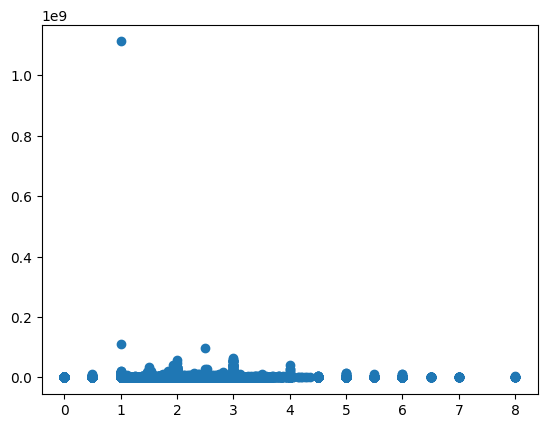

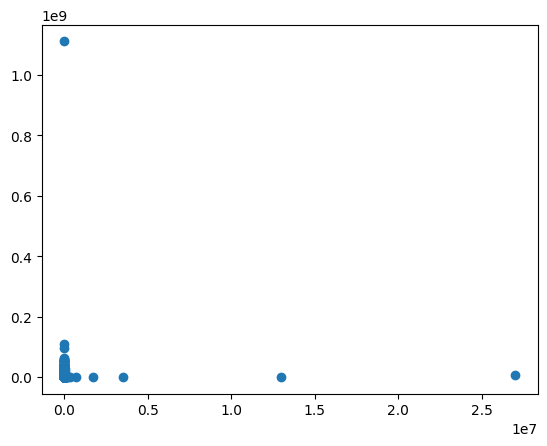

In [299]:
plt.scatter(X_val['rooms'], y_val)
plt.show()

plt.scatter(X_val['surface_covered'], y_val)
plt.show()